# Alberto Ferrera
## K-State Honor Code: "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

======================================================================================================================

# 1. Business Understanding:

Data analytics has played a major role in the entertainment indusrty for a while now. The need to understand human behavior in order to predict movies success, has driven the film industry to gather and manipulate data for business decision optimization and to get a slight advantage within the industry. Unfortunately, understanding and quantifying the factors that directly influence the success rate of a film may not always be enough to predict the outcome of a movie.

Taking into account the considerable investments in order to create and market a movie, the industry is still trying to figure out a perfect formula in order to minimize risk. So far, variables like:
 
     * Release Dates
     * Social Media Feedback 
     * Current Market Trends

to name a few, are the main focus for these analyses. Understanding when to release a film is crucial to it's success. You have to take into account holidays, other big events, the day of the week, what other movies are being released, time of the month, etc. Social media feedback is highly influencial when determining the success of a film. Taking into account any reaction, comments, and even likes, throughout various platforms about a rumor, an advancement, and expectations of a movie will help to predict the outcome of a movie. 

Various platforms like IMDB and Rotten Tomatoes have helped by trying to quantify movies success, taking into account various factors that are then compared to some type of scoring scale throughout the years. 

The goal of this project is to attempt to use past IMDB data and IMDB scores to understand movies performances, and to try to build a model to predict movies success. Personally, I would try to gather data that depicted human preferences and attitudes towards the movie, investment amounts, and anything regarding the release timing. For this project though, we will use a data set provided to us using IMDB's data base for about 5000 movies. The goal is to build a relationship between the above described variables and the scoring scale used by IMDB. For example, the investment for each movie should probably have a positive relationship with the success rate (IMDB score) of the movie. The amount of likes would also have a positive relationship with the IMDB score of the movie. It would be interesting to determine the realtionship between release date and IMDB score, but we have other variables such as duration of the movie and language. Duration would also be hard to quantify since it depends on the type of movie to determine if the people would actually mind the movie being too long or too short. Still, I would assume that the longer the movie the lower the score and the worse the people reviews. 


# 2. Data Understanding:

In [480]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

# random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# random forest classifier
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
from statsmodels.formula.api import ols

# clustering 
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [481]:
df = pd.read_csv("data/movie_data.csv")
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color  James Cameron      723.0                   178.0      
1  Color  Gore Verbinski     302.0                   169.0      
2  Color  Sam Mendes         602.0                   148.0      
3  Color  Christopher Nolan  813.0                   164.0      
4  NaN    Doug Walker       NaN                     NaN         

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0  0.0                      855.0                   Joel David Moore   
1  563.0                    1000.0                  Orlando Bloom      
2  0.0                      161.0                   Rory Kinnear       
3  22000.0                  23000.0                 Christian Bale     
4  131.0                   NaN                      Rob Walker         

   actor_1_facebook_likes        gross                           genres  \
0  1000.0                  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1  40000.0                 309404152.0  Action|Adventure|Fantasy          
2  11000.0                 200074175.0  Action|Adventure|Thriller         
3  27000.0                 448130642.0  Action|Thriller                   
4  131.0                  NaN           Documentary                       

      actor_1_name                                              movie_title  \
0  CCH Pounder      Avatar                                                    
1  Johnny Depp      Pirates of the Caribbean: At World's End                  
2  Christoph Waltz  Spectre                                                   
3  Tom Hardy        The Dark Knight Rises                                     
4  Doug Walker      Star Wars: Episode VII - The Force Awakens                

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0  886204           4834                       Wes Studi              
1  471220           48350                      Jack Davenport         
2  275868           11700                      Stephanie Sigman       
3  1144337          106759                     Joseph Gordon-Levitt   
4  8                143                        NaN                    

   facenumber_in_poster  \
0  0.0                    
1  0.0                    
2  1.0                    
3  0.0                    
4  0.0                    

                                                      plot_keywords  \
0  avatar|future|marine|native|paraplegic                             
1  goddess|marriage ceremony|marriage proposal|pirate|singapore       
2  bomb|espionage|sequel|spy|terrorist                                
3  deception|imprisonment|lawlessness|police officer|terrorist plot   
4  NaN                                                                

                                        movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1  3054.0                 
1  http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1  1238.0                 
2  http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1  994.0                  
3  http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1  2701.0                 
4  http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1 NaN                     

  language country content_rating       budget  title_year  \
0  English  USA     PG-13          237000000.0  2009.0       
1  English  USA     PG-13          300000000.0  2007.0       
2  English  UK      PG-13          245000000.0  2015.0       
3  English  USA     PG-13          250000000.0  2012.0       
4  NaN      NaN     NaN           NaN          NaN           

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0  936.0                   7.9         1.78          33000                 
1  5000.0                  7.1         2.35          0                     
2  393.0                   6.8         2.35          85000                 
3  23000.0                 8.5         2.35          164000             

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [483]:
df.isnull().sum()

color                        19 
director_name                104
num_critic_for_reviews       50 
duration                     15 
director_facebook_likes      104
actor_3_facebook_likes       23 
actor_2_name                 13 
actor_1_facebook_likes       7  
gross                        884
genres                       0  
actor_1_name                 7  
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
actor_3_name                 23 
facenumber_in_poster         13 
plot_keywords                153
movie_imdb_link              0  
num_user_for_reviews         21 
language                     12 
country                      5  
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes       13 
imdb_score                   0  
aspect_ratio                 329
movie_facebook_likes         0  
dtype: int64

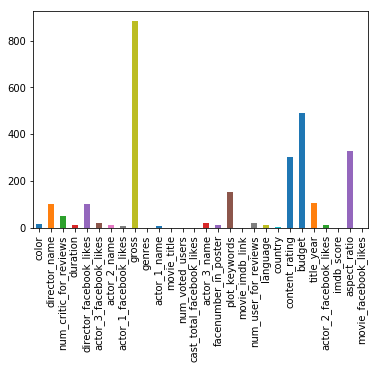

In [484]:
df.isnull().sum().plot(kind='bar')

In [485]:
df.describe()

num_critic_for_reviews     duration  director_facebook_likes  \
count  4993.000000             5028.000000  4939.000000               
mean   140.194272              107.201074   686.509212                
std    121.601675              25.197441    2813.328607               
min    1.000000                7.000000     0.000000                  
25%    50.000000               93.000000    7.000000                  
50%    110.000000              103.000000   49.000000                 
75%    195.000000              118.000000   194.500000                
max    813.000000              511.000000   23000.000000              

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count  5020.000000             5036.000000             4.159000e+03   
mean   645.009761              6560.047061             4.846841e+07   
std    1665.041728             15020.759120            6.845299e+07   
min    0.000000                0.000000                1.620000e+02   
25%    133.000000              614.000000              5.340988e+06   
50%    371.500000              988.000000              2.551750e+07   
75%    636.000000              11000.000000            6.230944e+07   
max    23000.000000            640000.000000           7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count  5.043000e+03     5043.000000                5030.000000            
mean   8.366816e+04     9699.063851                1.371173               
std    1.384853e+05     18163.799124               2.013576               
min    5.000000e+00     0.000000                   0.000000               
25%    8.593500e+03     1411.000000                0.000000               
50%    3.435900e+04     3090.000000                1.000000               
75%    9.630900e+04     13756.500000               2.000000               
max    1.689764e+06     656730.000000              43.000000              

       num_user_for_reviews        budget   title_year  \
count  5022.000000           4.551000e+03  4935.000000   
mean   272.770808            3.975262e+07  2002.470517   
std    377.982886            2.061149e+08  12.474599     
min    1.000000              2.180000e+02  1916.000000   
25%    65.000000             6.000000e+06  1999.000000   
50%    156.000000            2.000000e+07  2005.000000   
75%    326.000000            4.500000e+07  2011.000000   
max    5060.000000           1.221550e+10  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count  5030.000000             5043.000000  4714.000000   5043.000000           
mean   1651.754473             6.442138     2.220403      7525.964505           
std    4042.438863             1.125116     1.385113      19320.445110          
min    0.000000                1.600000     1.180000      0.000000              
25%    281.000000              5.800000     1.850000      0.000000              
50%    595.000000              6.600000     2.350000      166.000000            
75%    918.000000              7.200000     2.350000      3000.000000           
max    137000.000000           9.500000     16.000000     349000.000000

# 3. Data Preparation:

In [486]:
movie = df

In [487]:
movie.shape

(5043, 28)

In [488]:
corr = pd.DataFrame(movie.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

imdb_score
num_voted_users            0.410965  
num_critic_for_reviews     0.305303  
num_user_for_reviews       0.292475  
duration                   0.261662  
movie_facebook_likes       0.247049  
gross                      0.198021  
director_facebook_likes    0.170802  
cast_total_facebook_likes  0.085787  
actor_2_facebook_likes     0.083808  
actor_1_facebook_likes     0.076099  
aspect_ratio               0.059445  
actor_3_facebook_likes     0.052633  
budget                     0.030688  
facenumber_in_poster      -0.062958  
title_year                -0.209167

The variables that I will be focusing on for this project are: 
    - Number of people who voted for each movie
    - Number of critical reviews
    - number of reviews from user for each movie
    - Duration of each movie
    - Number of facebook likes for each movie
    - Director facebook likes 
    - Gross revenue, budget, and profit for each movie
These seem to be the most influential variables in terms of their impact on a good IMDB Score, or at least some that I think should have an impact. We will begin to analyze them and understand their effects and relationship to each score. 

In [489]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [490]:
df.groupby('content_rating').size().head()

content_rating
Approved    55 
G           112
GP          6  
M           5  
NC-17       7  
dtype: int64

In [491]:
df.groupby('genres').size().head()

genres
Action                                                             11
Action|Adventure                                                   11
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy             1 
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller    1 
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi              2 
dtype: int64

Variables like the movie link and plot keywords will be very tedious to work with. The link is just the address within the IMDB webpage were you can find the movie. It is standard for every movie and I assume (almost sure) it doesn't have any impact on a score. Plot keywords are just random words which are associated with the movie, they inflict no har or benefit to a movie's score. Getting rid of them would be a good way to simplify/clean our data set.

In [492]:
movie = movie.drop(['movie_imdb_link', 'plot_keywords'], axis=1)
movie.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color  James Cameron      723.0                   178.0      
1  Color  Gore Verbinski     302.0                   169.0      
2  Color  Sam Mendes         602.0                   148.0      
3  Color  Christopher Nolan  813.0                   164.0      
4  NaN    Doug Walker       NaN                     NaN         

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0  0.0                      855.0                   Joel David Moore   
1  563.0                    1000.0                  Orlando Bloom      
2  0.0                      161.0                   Rory Kinnear       
3  22000.0                  23000.0                 Christian Bale     
4  131.0                   NaN                      Rob Walker         

   actor_1_facebook_likes        gross                           genres  \
0  1000.0                  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1  40000.0                 309404152.0  Action|Adventure|Fantasy          
2  11000.0                 200074175.0  Action|Adventure|Thriller         
3  27000.0                 448130642.0  Action|Thriller                   
4  131.0                  NaN           Documentary                       

      actor_1_name                                              movie_title  \
0  CCH Pounder      Avatar                                                    
1  Johnny Depp      Pirates of the Caribbean: At World's End                  
2  Christoph Waltz  Spectre                                                   
3  Tom Hardy        The Dark Knight Rises                                     
4  Doug Walker      Star Wars: Episode VII - The Force Awakens                

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0  886204           4834                       Wes Studi              
1  471220           48350                      Jack Davenport         
2  275868           11700                      Stephanie Sigman       
3  1144337          106759                     Joseph Gordon-Levitt   
4  8                143                        NaN                    

   facenumber_in_poster  num_user_for_reviews language country content_rating  \
0  0.0                   3054.0                English  USA     PG-13           
1  0.0                   1238.0                English  USA     PG-13           
2  1.0                   994.0                 English  UK      PG-13           
3  0.0                   2701.0                English  USA     PG-13           
4  0.0                  NaN                    NaN      NaN     NaN             

        budget  title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  \
0  237000000.0  2009.0      936.0                   7.9         1.78           
1  300000000.0  2007.0      5000.0                  7.1         2.35           
2  245000000.0  2015.0      393.0                   6.8         2.35           
3  250000000.0  2012.0      23000.0                 8.5         2.35           
4 NaN          NaN          12.0                    7.1        NaN             

   movie_facebook_likes  
0  33000                 
1  0                     
2  85000                 
3  164000                
4  0

In [493]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 26 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
num_user_for_reviews         5022 non-null float64
language                     5031 non

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000035BC7C88>,
      dtype=object)

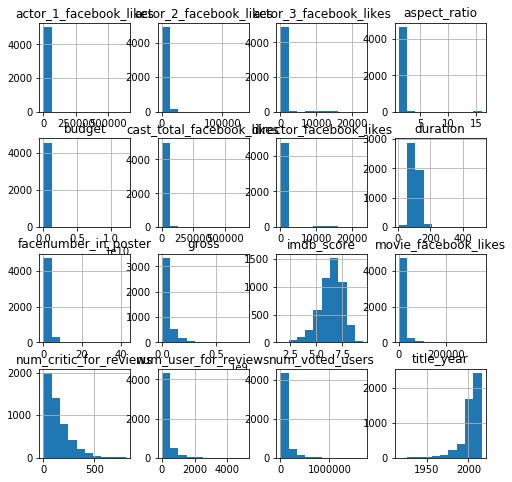

In [494]:
movie.hist(figsize=(8,8))

We can see that the IMDB_score is very close to a symmetric shape which would suggest a normal distribution revolving around the mean. Apparently not many movies get scores below a 4 and not many can go up to a 8-8.5.

In [495]:
movie['imdb_score'].describe()

count    5043.000000
mean     6.442138   
std      1.125116   
min      1.600000   
25%      5.800000   
50%      6.600000   
75%      7.200000   
max      9.500000   
Name: imdb_score, dtype: float64

In [496]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 26 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
num_user_for_reviews         5022 non-null float64
language                     5031 non

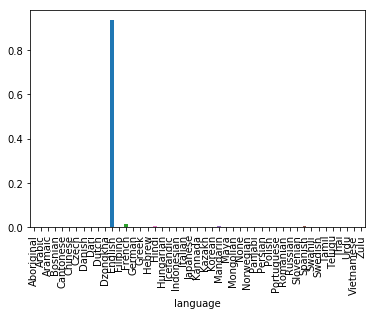

In [497]:
language_dist = movie.groupby('language').size() / len(movie)
language_dist.plot(kind='bar')

In [498]:
movie.isnull().sum()

color                        19 
director_name                104
num_critic_for_reviews       50 
duration                     15 
director_facebook_likes      104
actor_3_facebook_likes       23 
actor_2_name                 13 
actor_1_facebook_likes       7  
gross                        884
genres                       0  
actor_1_name                 7  
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
actor_3_name                 23 
facenumber_in_poster         13 
num_user_for_reviews         21 
language                     12 
country                      5  
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes       13 
imdb_score                   0  
aspect_ratio                 329
movie_facebook_likes         0  
dtype: int64

There are missing values in the data set, but we could be loosing so much information, which at this point, and for the purpose of this project which be pointless. We are just looking for the impact of different movie variables on their IMDB scores. 

--------------------------------------------------------------------------------------

I would like to see a profit column, to actually see the impact of the investment and it's performance on the movie's score. 

In [499]:
movie['profit'] = movie['gross'] - movie['budget']
movie.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color  James Cameron      723.0                   178.0      
1  Color  Gore Verbinski     302.0                   169.0      
2  Color  Sam Mendes         602.0                   148.0      
3  Color  Christopher Nolan  813.0                   164.0      
4  NaN    Doug Walker       NaN                     NaN         

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0  0.0                      855.0                   Joel David Moore   
1  563.0                    1000.0                  Orlando Bloom      
2  0.0                      161.0                   Rory Kinnear       
3  22000.0                  23000.0                 Christian Bale     
4  131.0                   NaN                      Rob Walker         

   actor_1_facebook_likes        gross                           genres  \
0  1000.0                  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1  40000.0                 309404152.0  Action|Adventure|Fantasy          
2  11000.0                 200074175.0  Action|Adventure|Thriller         
3  27000.0                 448130642.0  Action|Thriller                   
4  131.0                  NaN           Documentary                       

      actor_1_name                                              movie_title  \
0  CCH Pounder      Avatar                                                    
1  Johnny Depp      Pirates of the Caribbean: At World's End                  
2  Christoph Waltz  Spectre                                                   
3  Tom Hardy        The Dark Knight Rises                                     
4  Doug Walker      Star Wars: Episode VII - The Force Awakens                

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0  886204           4834                       Wes Studi              
1  471220           48350                      Jack Davenport         
2  275868           11700                      Stephanie Sigman       
3  1144337          106759                     Joseph Gordon-Levitt   
4  8                143                        NaN                    

   facenumber_in_poster  num_user_for_reviews language country content_rating  \
0  0.0                   3054.0                English  USA     PG-13           
1  0.0                   1238.0                English  USA     PG-13           
2  1.0                   994.0                 English  UK      PG-13           
3  0.0                   2701.0                English  USA     PG-13           
4  0.0                  NaN                    NaN      NaN     NaN             

        budget  title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  \
0  237000000.0  2009.0      936.0                   7.9         1.78           
1  300000000.0  2007.0      5000.0                  7.1         2.35           
2  245000000.0  2015.0      393.0                   6.8         2.35           
3  250000000.0  2012.0      23000.0                 8.5         2.35           
4 NaN          NaN          12.0                    7.1        NaN             

   movie_facebook_likes       profit  
0  33000                 523505847.0  
1  0                     9404152.0    
2  85000                -44925825.0   
3  164000                198130642.0  
4  0                    NaN

In [500]:
corr = pd.DataFrame(movie.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

imdb_score
num_voted_users            0.410965  
num_critic_for_reviews     0.305303  
num_user_for_reviews       0.292475  
duration                   0.261662  
movie_facebook_likes       0.247049  
gross                      0.198021  
director_facebook_likes    0.170802  
cast_total_facebook_likes  0.085787  
actor_2_facebook_likes     0.083808  
actor_1_facebook_likes     0.076099  
aspect_ratio               0.059445  
actor_3_facebook_likes     0.052633  
profit                     0.036634  
budget                     0.030688  
facenumber_in_poster      -0.062958  
title_year                -0.209167

Profit still has a very low impact on the imdb score. I may be confirming my assumption that the most influencial variables are those which represent human reaction to each movie. 

In [501]:
movie.shape

(5043, 27)

I would also like to check for duplicates in the data set because that would cause some type of effect on our analysis. 

In [502]:
movie.duplicated().sum()

45

45 duplicates in the data-set.

In [503]:
movie.loc[movie.duplicated(), : ].head()

color director_name  num_critic_for_reviews  duration  \
137  Color  David Yates   248.0                   110.0      
187  Color  Bill Condon   322.0                   115.0      
204  Color  Hideaki Anno  1.0                     120.0      
303  Color  Joe Wright    256.0                   111.0      
389  Color  Josh Trank    369.0                   100.0      

     director_facebook_likes  actor_3_facebook_likes         actor_2_name  \
137  282.0                    103.0                   Alexander Skarsgård   
187  386.0                    12000.0                 Kristen Stewart       
204  28.0                     12.0                    Shin'ya Tsukamoto     
303  456.0                    394.0                   Cara Delevingne       
389  128.0                    78.0                    Reg E. Cathey         

     actor_1_facebook_likes        gross  \
137  11000.0                 124051759.0   
187  21000.0                 292298923.0   
204  544.0                  NaN            
303  20000.0                 34964818.0    
389  596.0                   56114221.0    

                                   genres      actor_1_name  \
137  Action|Adventure|Drama|Romance        Christoph Waltz    
187  Adventure|Drama|Fantasy|Romance       Robert Pattinson   
204  Action|Adventure|Drama|Horror|Sci-Fi  Mark Chinnery      
303  Adventure|Family|Fantasy              Hugh Jackman       
389  Action|Adventure|Sci-Fi               Tim Blake Nelson   

                                    movie_title  num_voted_users  \
137  The Legend of Tarzan                        42372             
187  The Twilight Saga: Breaking Dawn - Part 2   185394            
204  Godzilla Resurgence                         374               
303  Pan                                         39956             
389  Fantastic Four                              110486            

     cast_total_facebook_likes    actor_3_name  facenumber_in_poster  \
137  21175                      Casper Crump    2.0                    
187  59177                      Taylor Lautner  3.0                    
204  699                        Atsuko Maeda    0.0                    
303  21393                      Nonso Anozie    4.0                    
389  1261                       Tim Heidecker   3.0                    

     num_user_for_reviews  language country content_rating       budget  \
137  239.0                 English   USA     PG-13          180000000.0   
187  329.0                 English   USA     PG-13          120000000.0   
204  13.0                  Japanese  Japan   NaN           NaN            
303  186.0                 English   USA     PG             150000000.0   
389  695.0                 English   USA     PG-13          120000000.0   

     title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  \
137  2016.0      10000.0                 6.6         2.35           
187  2012.0      17000.0                 5.5         2.35           
204  2016.0      106.0                   8.2         2.35           
303  2015.0      548.0                   5.8         2.35           
389  2015.0      360.0                   4.3         2.35           

     movie_facebook_likes       profit  
137  29000                -55948241.0   
187  65000                 172298923.0  
204  0                    NaN           
303  24000                -115035182.0  
389  41000                -63885779.0

In [504]:
movie = movie.drop_duplicates(keep='first')
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 27 columns):
color                        4979 non-null object
director_name                4895 non-null object
num_critic_for_reviews       4949 non-null float64
duration                     4983 non-null float64
director_facebook_likes      4895 non-null float64
actor_3_facebook_likes       4975 non-null float64
actor_2_name                 4985 non-null object
actor_1_facebook_likes       4991 non-null float64
gross                        4124 non-null float64
genres                       4998 non-null object
actor_1_name                 4991 non-null object
movie_title                  4998 non-null object
num_voted_users              4998 non-null int64
cast_total_facebook_likes    4998 non-null int64
actor_3_name                 4975 non-null object
facenumber_in_poster         4985 non-null float64
num_user_for_reviews         4977 non-null float64
language                     4986 non

In [505]:
movie.shape

(4998, 27)

Clean data correlation analysis. 

In [506]:
corr = pd.DataFrame(movie.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

imdb_score
num_voted_users            0.411299  
num_critic_for_reviews     0.307226  
num_user_for_reviews       0.292745  
duration                   0.262618  
movie_facebook_likes       0.249604  
gross                      0.198417  
director_facebook_likes    0.171564  
cast_total_facebook_likes  0.085091  
actor_2_facebook_likes     0.082400  
actor_1_facebook_likes     0.075952  
aspect_ratio               0.060266  
actor_3_facebook_likes     0.051683  
profit                     0.035862  
budget                     0.031061  
facenumber_in_poster      -0.064403  
title_year                -0.207591

# 4. Business Intelligence:

## Visualize the relationship between the imdb score and the number of people who voted for a movie. What are the top 10 most voted movies? What is the average amount of votes for a higher IMDB score?
    *Remember that this was the most influencial varaible (41% positive correlation).

C:\Users\fabri\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\fabri\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


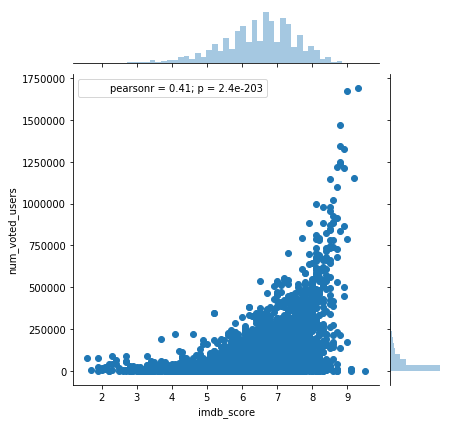

In [507]:
sns.jointplot("imdb_score", "num_voted_users", movie)

In [508]:
movie.groupby('movie_title')['num_voted_users'].sum().sort_values(ascending=False).head(10)

movie_title
The Shawshank Redemption                              1689764
The Dark Knight                                       1676169
Inception                                             1468200
Fight Club                                            1347461
Pulp Fiction                                          1324680
Forrest Gump                                          1251222
The Lord of the Rings: The Fellowship of the Ring     1238746
The Matrix                                            1217752
The Lord of the Rings: The Return of the King         1215718
The Godfather                                         1155770
Name: num_voted_users, dtype: int64

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000.]),
 <a list of 10 Text xticklabel objects>)

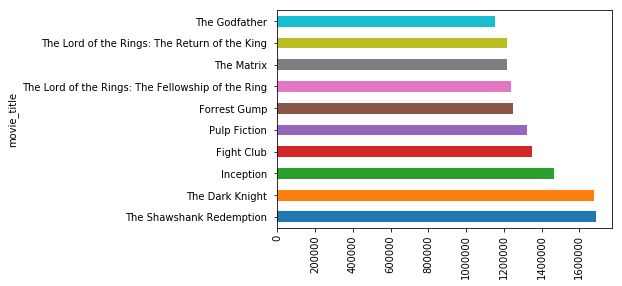

In [509]:
movie.groupby('movie_title')['num_voted_users'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.xticks(rotation=90)

In [510]:
movie.groupby('imdb_score')['num_voted_users'].mean().sort_values(ascending=False).head()

imdb_score
9.3    1.689764e+06
9.2    1.155770e+06
8.8    9.271837e+05
9.0    8.790500e+05
8.9    8.713424e+05
Name: num_voted_users, dtype: float64

The average amount of votes by users a movie should receive to rank among the top imdb scores. 

## Visualize the relationship between number of critics reviews and the imdb score. What are top 5 movies that received more critic's reviews?

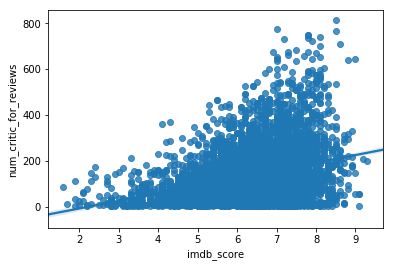

In [511]:
sns.regplot(movie.imdb_score, movie.num_critic_for_reviews)
#"imdb_score", "num_critic_for_reviews", data=movie, kind="kde", space=0, color="r")

In [512]:
movie.groupby('movie_title')['num_critic_for_reviews'].mean().sort_values(ascending=False).head()

movie_title
The Dark Knight Rises     813.0
Prometheus                775.0
Django Unchained          765.0
Skyfall                   750.0
Mad Max: Fury Road        739.0
Name: num_critic_for_reviews, dtype: float64

In [513]:
criticsandscore = movie[['imdb_score', 'num_critic_for_reviews']]
criticsandscore.sort_values('num_critic_for_reviews', ascending=False).head()

imdb_score  num_critic_for_reviews
3     8.5         813.0                 
227   7.0         775.0                 
296   8.5         765.0                 
3493  7.8         750.0                 
30    7.8         750.0

The best imdb scores with their avg amount of critic reviews required. It is clear the a good amount of critics reviews (interactions) is neede in order to get a good imdb score. 

## What is the relationship between a movie's user reviews and its IMDB Score? 

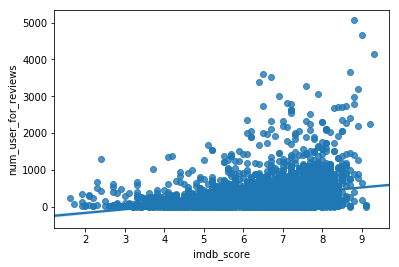

In [514]:
sns.regplot(movie.imdb_score, movie.num_user_for_reviews)

In [515]:
movie.groupby('imdb_score')['num_user_for_reviews'].mean().sort_values(ascending=False).head()

imdb_score
9.3    4144.000000
9.2    2238.000000
8.8    1953.428571
9.0    1830.000000
8.9    1665.000000
Name: num_user_for_reviews, dtype: float64

The average amount of user reviews to get a good IMDB Score. 

## What is the relationship between IMDB Score and Duration? 

C:\Users\fabri\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\fabri\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


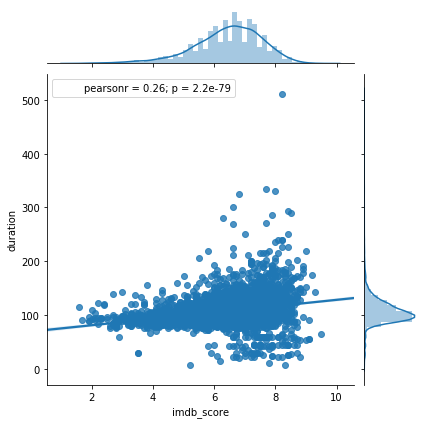

In [516]:
sns.jointplot(x="imdb_score", y="duration", data=movie, kind="reg");

In [517]:
movie.groupby('imdb_score')['duration'].mean().sort_values(ascending=False).head()

imdb_score
9.2    175.000000
8.9    158.600000
9.3    142.000000
9.0    141.666667
8.2    133.475000
Name: duration, dtype: float64

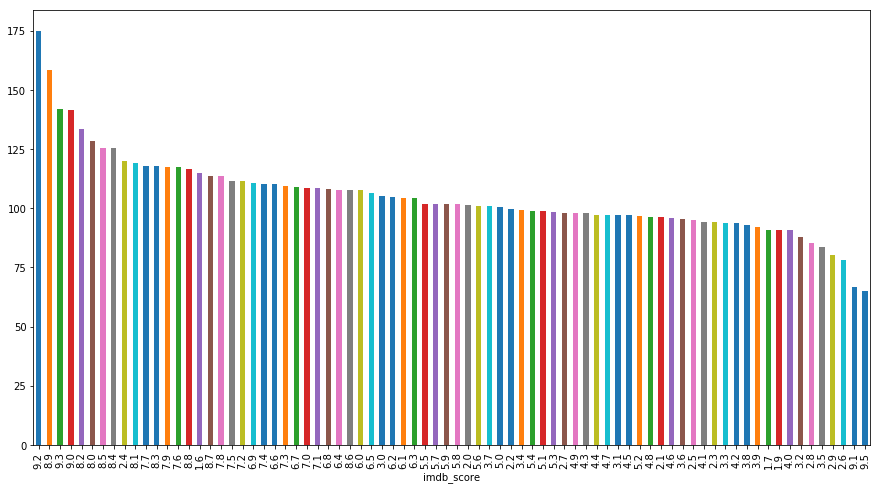

In [518]:
movie.groupby('imdb_score')['duration'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))

The mean duration of movies with high IMDB Scores. 

## What are the Top 10 most Profitable Movies?

In [519]:
top10 = movie.sort_values('profit', ascending=False).head(10)
top10

color      director_name  num_critic_for_reviews  duration  \
0     Color  James Cameron      723.0                   178.0      
29    Color  Colin Trevorrow    644.0                   124.0      
26    Color  James Cameron      315.0                   194.0      
3024  Color  George Lucas       282.0                   125.0      
3080  Color  Steven Spielberg   215.0                   120.0      
17    Color  Joss Whedon        703.0                   173.0      
509   Color  Roger Allers       186.0                   73.0       
240   Color  George Lucas       320.0                   136.0      
66    Color  Christopher Nolan  645.0                   152.0      
439   Color  Gary Ross          673.0                   142.0      

      director_facebook_likes  actor_3_facebook_likes       actor_2_name  \
0     0.0                      855.0                   Joel David Moore    
29    365.0                    1000.0                  Judy Greer          
26    0.0                      794.0                   Kate Winslet        
3024  0.0                      504.0                   Peter Cushing       
3080  14000.0                  548.0                   Dee Wallace         
17    0.0                      19000.0                 Robert Downey Jr.   
509   28.0                     847.0                   Nathan Lane         
240   0.0                      1000.0                  Liam Neeson         
66    22000.0                  11000.0                 Heath Ledger        
439   378.0                    575.0                   Josh Hutcherson     

      actor_1_facebook_likes        gross  \
0     1000.0                  760505847.0   
29    3000.0                  652177271.0   
26    29000.0                 658672302.0   
3024  11000.0                 460935665.0   
3080  861.0                   434949459.0   
17    26000.0                 623279547.0   
509   2000.0                  422783777.0   
240   20000.0                 474544677.0   
66    23000.0                 533316061.0   
439   34000.0                 407999255.0   

                                        genres         actor_1_name  \
0     Action|Adventure|Fantasy|Sci-Fi           CCH Pounder           
29    Action|Adventure|Sci-Fi|Thriller          Bryce Dallas Howard   
26    Drama|Romance                             Leonardo DiCaprio     
3024  Action|Adventure|Fantasy|Sci-Fi           Harrison Ford         
3080  Family|Sci-Fi                             Henry Thomas          
17    Action|Adventure|Sci-Fi                   Chris Hemsworth       
509   Adventure|Animation|Drama|Family|Musical  Matthew Broderick     
240   Action|Adventure|Fantasy|Sci-Fi           Natalie Portman       
66    Action|Crime|Drama|Thriller               Christian Bale        
439   Adventure|Drama|Sci-Fi|Thriller           Jennifer Lawrence     

                                     movie_title  num_voted_users  \
0     Avatar                                      886204            
29    Jurassic World                              418214            
26    Titanic                                     793059            
3024  Star Wars: Episode IV - A New Hope          911097            
3080  E.T. the Extra-Terrestrial                  281842            
17    The Avengers                                995415            
509   The Lion King                               644348            
240   Star Wars: Episode I - The Phantom Menace   534658            
66    The Dark Knight                             1676169           
439   The Hunger Games                            701607            

      cast_total_facebook_likes        actor_3_name  facenumber_in_poster  \
0     4834                       Wes Studi           0.0                    
29    8458                       Omar Sy             0.0                    
26    45223                      Gloria Stuart       0.0                    
3024  13485                      Kenny Baker         1.0                  

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

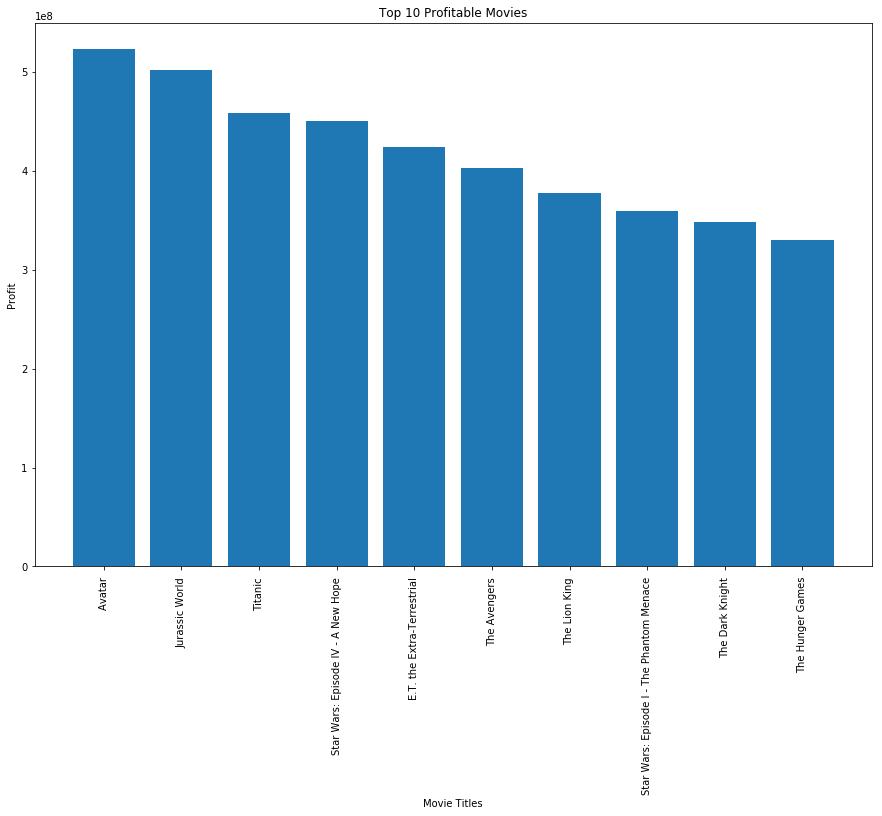

In [520]:
plt.figure(figsize=(15,10))
plt.bar(top10.movie_title, top10.profit)
plt.xlabel('Movie Titles')
plt.ylabel('Profit')
plt.title('Top 10 Profitable Movies')
plt.xticks(rotation=90)

## What are the directors with most facebook likes?

In [521]:
movie.groupby('director_name').size().sort_values(ascending=False).head(10)

director_name
Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         17
Spike Lee            16
Tim Burton           16
Steven Soderbergh    16
Renny Harlin         15
Oliver Stone         14
dtype: int64

In [522]:
movie.groupby('director_name')['director_facebook_likes'].sum().sort_values(ascending=False).head(10)

director_name
Steven Spielberg     364000.0
Martin Scorsese      340000.0
Clint Eastwood       320000.0
Woody Allen          242000.0
David Fincher        210000.0
Tim Burton           208000.0
Christopher Nolan    176000.0
Tony Scott           144000.0
Quentin Tarantino    128000.0
Alfred Hitchcock     104000.0
Name: director_facebook_likes, dtype: float64

## Visualize the relationship between the budget (investment) and the imdb score. Highest budget movie?

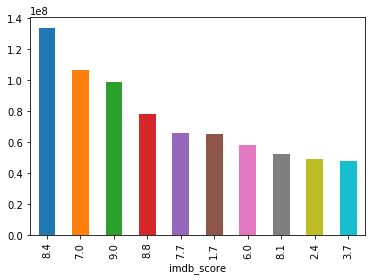

In [523]:
movie.groupby('imdb_score')['budget'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

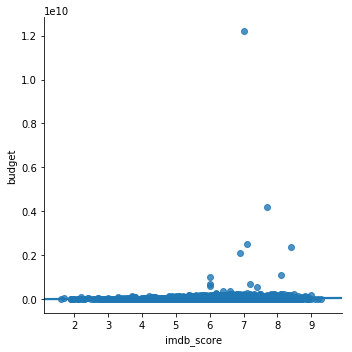

In [524]:
sns.lmplot("imdb_score", "budget", df)

In [525]:
title_budget = movie[['movie_title', 'budget']]
title_budget.sort_values('budget', ascending=False).head(1)

movie_title        budget
2988  The Host    1.221550e+10

In [526]:
movie[movie['movie_title'].str.contains("Host") & movie['director_name'].str.contains("Joon-ho")]

color director_name  num_critic_for_reviews  duration  \
2988  Color  Joon-ho Bong  363.0                   110.0      

      director_facebook_likes  actor_3_facebook_likes  actor_2_name  \
2988  584.0                    74.0                    Kang-ho Song   

      actor_1_facebook_likes      gross                      genres  \
2988  629.0                   2201412.0  Comedy|Drama|Horror|Sci-Fi   

     actor_1_name movie_title  num_voted_users  cast_total_facebook_likes  \
2988  Doona Bae    The Host    68883            1173                        

     actor_3_name  facenumber_in_poster  num_user_for_reviews language  \
2988  Ah-sung Ko   0.0                   279.0                 Korean    

          country content_rating        budget  title_year  \
2988  South Korea  R              1.221550e+10  2006.0       

      actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  \
2988  398.0                   7.0         1.85          7000                   

            profit  
2988 -1.221330e+10

## Top movies in terms of their imdb score? 

In [527]:
movie2 = movie[['movie_title', 'imdb_score']]
movie2.sort_values('imdb_score', ascending=False).head()

movie_title  imdb_score
2765  Towering Inferno               9.5       
1937  The Shawshank Redemption       9.3       
3466  The Godfather                  9.2       
3207  Dekalog                        9.1       
2824  Dekalog                        9.1

## Top 10 movie-producing countries and top 20 highest IMDB Score by country? 

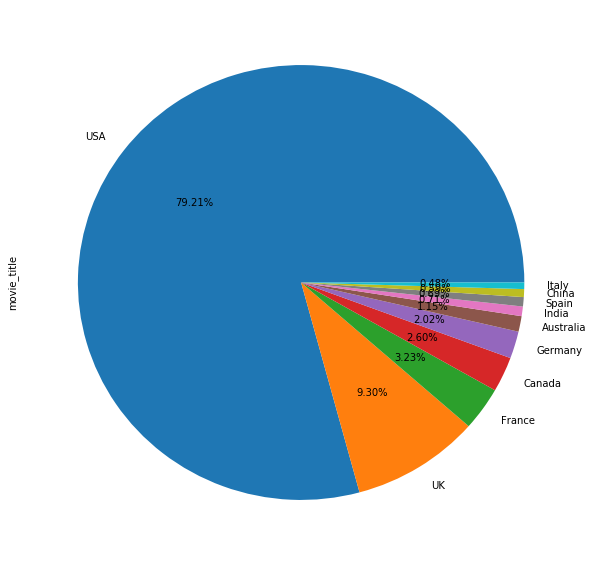

In [528]:
movie.groupby('country')['movie_title'].size().sort_values(ascending=False).head(10).plot(kind='pie', figsize=(10,10), autopct='%1.2f%%')

It is clear that almost 80% of the movies come from the USA, followed by the UK with almost 9.5%, and then other countries like France, Canada, Australia, Germany, Italy, etc., with lower percentages. 

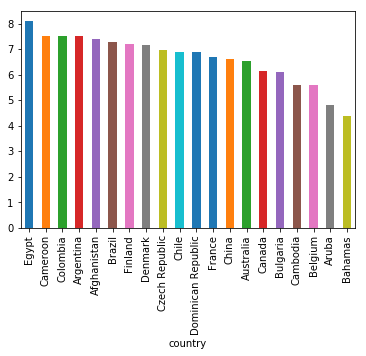

In [529]:
movie.groupby('country')['imdb_score'].mean().head(20).sort_values(ascending=False).plot(kind='bar')

The country with the highest average imdb score is Egypt. 

## What are the average amount of facebook likes a director needs to contribute to a high IMDB Score? 

In [530]:
movie.groupby('imdb_score')['director_facebook_likes'].mean().sort_values(ascending=False).head()

imdb_score
9.0    11000.000000
8.8    8776.600000 
8.5    6146.904762 
8.9    6000.000000 
8.6    5412.916667 
Name: director_facebook_likes, dtype: float64

# 5. Correlation Analysis:

In [531]:
movie.corr()

num_critic_for_reviews  duration  \
num_critic_for_reviews     1.000000                0.257529   
duration                   0.257529                1.000000   
director_facebook_likes    0.181246                0.173027   
actor_3_facebook_likes     0.265591                0.119806   
actor_1_facebook_likes     0.189533                0.087567   
gross                      0.477603                0.247443   
num_voted_users            0.624255                0.313935   
cast_total_facebook_likes  0.260753                0.120975   
facenumber_in_poster      -0.035380                0.014060   
num_user_for_reviews       0.608175                0.328413   
budget                     0.119237                0.073586   
title_year                 0.276845               -0.137076   
actor_2_facebook_likes     0.280421                0.129660   
imdb_score                 0.307226                0.262618   
aspect_ratio              -0.050243               -0.090680   
movie_facebook_likes       0.681723                0.194401   
profit                     0.039550                0.008458   

                           director_facebook_likes  actor_3_facebook_likes  \
num_critic_for_reviews     0.181246                 0.265591                 
duration                   0.173027                 0.119806                 
director_facebook_likes    1.000000                 0.123204                 
actor_3_facebook_likes     0.123204                 1.000000                 
actor_1_facebook_likes     0.091374                 0.250000                 
gross                      0.146368                 0.289965                 
num_voted_users            0.299873                 0.277918                 
cast_total_facebook_likes  0.120781                 0.470036                 
facenumber_in_poster      -0.040732                 0.098381                 
num_user_for_reviews       0.223519                 0.225871                 
budget                     0.021015                 0.045718                 
title_year                -0.064856                 0.095383                 
actor_2_facebook_likes     0.121191                 0.556366                 
imdb_score                 0.171564                 0.051683                 
aspect_ratio               0.001390                -0.003095                 
movie_facebook_likes       0.162588                 0.267775                 
profit                     0.024969                 0.048038                 

                           actor_1_facebook_likes     gross  num_voted_users  \
num_critic_for_reviews     0.189533                0.477603  0.624255          
duration                   0.087567                0.247443  0.313935          
director_facebook_likes    0.091374                0.146368  0.299873          
actor_3_facebook_likes     0.250000                0.289965  0.277918          
actor_1_facebook_likes     1.000000                0.153083  0.191239          
gross                      0.153083                1.000000  0.635271          
num_voted_users            0.191239                0.635271  1.000000          
cast_total_facebook_likes  0.952760                0.240049  0.261063          
facenumber_in_poster       0.070709               -0.030124 -0.029861          
num_user_for_reviews       0.144768                0.561006  0.798691          
budget                     0.022202                0.101033  0.079069          
title_year                 0.086286                0.029110  0.007232          
actor_2_facebook_likes     0.389749                0.254172  0.265317          
imdb_score                 0.075952                0.198417  0.411299          
aspect_ratio              -0.020262                0.071362 -0.014510          
movie_facebook_likes       0.133604                0.370140  0.535218          
profit                     0.028130                0.205884  0.124928          

                           cast_total_facebook

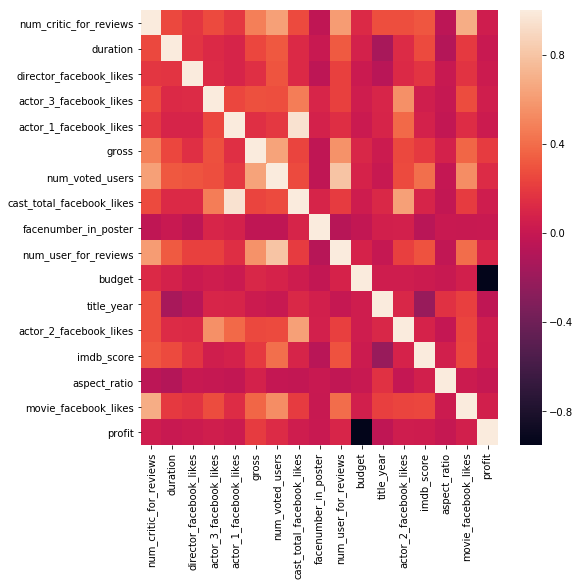

In [532]:
plt.figure(figsize=(8, 8))
sns.heatmap(movie.corr())

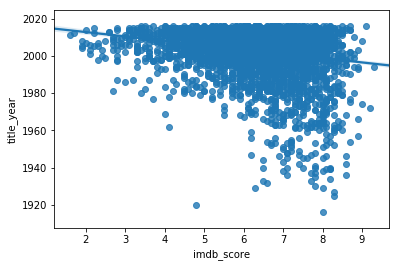

In [533]:
sns.regplot(movie.imdb_score, movie.title_year)

In [534]:
corr = pd.DataFrame(movie.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

imdb_score
num_voted_users            0.411299  
num_critic_for_reviews     0.307226  
num_user_for_reviews       0.292745  
duration                   0.262618  
movie_facebook_likes       0.249604  
gross                      0.198417  
director_facebook_likes    0.171564  
cast_total_facebook_likes  0.085091  
actor_2_facebook_likes     0.082400  
actor_1_facebook_likes     0.075952  
aspect_ratio               0.060266  
actor_3_facebook_likes     0.051683  
profit                     0.035862  
budget                     0.031061  
facenumber_in_poster      -0.064403  
title_year                -0.207591

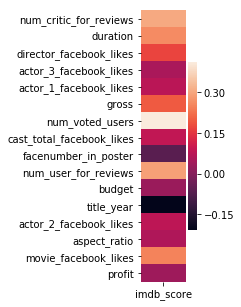

In [535]:
plt.figure(figsize=(1, 5))
sns.heatmap(corr)

After a thorough analysis, I'd like to summarize what we've learnt throughout this project about the behavior of each variable and it's influence on a good IMDB Score. First of all, I didn't expect that the budget for a movie would have such a weak correlation with it's performance (or in this case, IMDB score). Maybe it just has to do with the way IMDB rates each movie and gives a little more importance to the impact of each movie on people and critics. It appears that the more human interaction a movie causes, the higher the IMDB Score. This is reflected by the high percentages of positive correlation between variables like num of users who voted for the movie, num of critic's reviews, num of user reviews, and others like the amount of facebook likes for the movie or director's likes. Duration suprised me as well. I would assume that there are few movies that could pull a 2-2:30 hour duration that would keep peolpe hooked and would receive positive reviews and get voted. I assumed that the longer the people remained in the theater the more tired and annoyed they would get. Still, there is a 26% positive correlation between the duration of a movie and it's IMDB score. Other variables like the actor's facebook likes don't show quite the strong correlation (<10%), but I guess they help somehow. The only two variables that show a negative impact or relationship to it's IMDB scores are the number of actors who appear in the poster and the year the title was released. That basically means that the older the movie the higher the score, which could make sense if you factored that it had more time to receive reviews and votes. Still, facenum_in_poster's impact is minimal, close to meaningless. 

# 6. Story Telling:

As I completed this project, I figured that there should be a better way to predict a movie's success. IMDB rates movies performances after they come out. That means, they give a lot of importance to how people react to your movie. As seen in the correlation analyses and every visualization, the most strong relationships with the IMDB Score, are those variables that include some type of human reaction to each movie. Whether it is a review from a user or a critic, the amount of votes that a specific movie received on a poll, or even the rating (facebook likes) for each director. All of these are variables that are most likely to be accurate after the movie's comes out, but what about things that you could do before releasing a title in order for it to be succesful? Of course, you could use some of these like, understanding who are the top directors or their avg IMDB Score, as well as actors, but still, in our analysis, they don't seem to carry as much weight. Even a variable like budget. There may be movies around with average or even lower budgets that get to succeed, but I would guess that there is a higher impact on the amount of resources you could gather to make a movie succesful that would have a higher significance level than just 3%. 

Looking at the correlation for the variables we studied, we can understand that the most influential variables are those which include any type of human interaction with the movie itself. For example, the amount of users that voted for a movie. That has a 41% postitve relationship with the movie's IMDB Score. That means that the more votes a movie gets, the better rating it will receive. The same goes for critics and user reviews for the movie. Both carrying about a 30% positive relationship to the IMDB Score, they prove to be key aspects to take into consideration when releasing a new title. The duration of the movie must also be very well calculated. Duration carries a 26% weight into a positive relationship to a movie's IMDB Score. You need to make sure to stay within a safe margin of minutes a movie can have to keep everyone engaged while developing a good story. Other variables like gross revenue and profit carry some type of weight as well, but I feel like these variables will reflect your attention to the recently discussed ones. Ranging from 3%-20%, it is still very important that your movies receives a good amount of investment, to create the best queality content possible for your audience, and a good amount of revenue to cover the investment and still be profitable. 

So basically, how can we use what we now know in order to predict a better performance for every movie? Maybe start releasing polls to understand people's interest on genres or what they expect. Maybe having people actually reading the reviews for past movies to get some feedback and insights on how to improve. After all, it's all about the customer. If you don't give the customers what they want, your movie will not be succesful in any aspect. Companies within the industry should constantly be watching out for trends and customer preferences to release movies that will recieve more viewers. The endgame is actually giving more importance to those variables we studied like the reviews and votes from critics and users, to the facebook likes a director or actor has, because in the end, that is the ultimate feedback that anyone in the movie industry can receive. 

#### References:
    
I don't have references to every webpage or other examples that I've used in this project, but I still want to give credit to the people who have helped me finish this in the best way possible. 

As always, using stackoverflow to figure out different codes or at least a new way to write one is always helpful. 
www.stackoverflow.com

I also used the example provided by Dr. Chae to guide me through organizing my ideas and the project.
rstudio-pubs-tatic.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html

Of course, I used past labs and homeworks to help me complete every aspect of this project, and disucssing a few ideas with friends and having someone else proofread and judge my work. 


# Final Project - continuation

# Data Preparation

In [536]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 27 columns):
color                        4979 non-null object
director_name                4895 non-null object
num_critic_for_reviews       4949 non-null float64
duration                     4983 non-null float64
director_facebook_likes      4895 non-null float64
actor_3_facebook_likes       4975 non-null float64
actor_2_name                 4985 non-null object
actor_1_facebook_likes       4991 non-null float64
gross                        4124 non-null float64
genres                       4998 non-null object
actor_1_name                 4991 non-null object
movie_title                  4998 non-null object
num_voted_users              4998 non-null int64
cast_total_facebook_likes    4998 non-null int64
actor_3_name                 4975 non-null object
facenumber_in_poster         4985 non-null float64
num_user_for_reviews         4977 non-null float64
language                     4986 non

In [537]:
mov = movie.drop(['director_name', 'actor_1_name', 'actor_3_name', 'facenumber_in_poster', 'language', 'country', 'aspect_ratio', 'title_year', 'actor_2_name', 'movie_title'], axis=1)
mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 17 columns):
color                        4979 non-null object
num_critic_for_reviews       4949 non-null float64
duration                     4983 non-null float64
director_facebook_likes      4895 non-null float64
actor_3_facebook_likes       4975 non-null float64
actor_1_facebook_likes       4991 non-null float64
gross                        4124 non-null float64
genres                       4998 non-null object
num_voted_users              4998 non-null int64
cast_total_facebook_likes    4998 non-null int64
num_user_for_reviews         4977 non-null float64
content_rating               4697 non-null object
budget                       4511 non-null float64
actor_2_facebook_likes       4985 non-null float64
imdb_score                   4998 non-null float64
movie_facebook_likes         4998 non-null int64
profit                       3857 non-null float64
dtypes: float64(11), int64(3), obje

In [538]:
mov.dropna(inplace=True)
mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3797 entries, 0 to 5042
Data columns (total 17 columns):
color                        3797 non-null object
num_critic_for_reviews       3797 non-null float64
duration                     3797 non-null float64
director_facebook_likes      3797 non-null float64
actor_3_facebook_likes       3797 non-null float64
actor_1_facebook_likes       3797 non-null float64
gross                        3797 non-null float64
genres                       3797 non-null object
num_voted_users              3797 non-null int64
cast_total_facebook_likes    3797 non-null int64
num_user_for_reviews         3797 non-null float64
content_rating               3797 non-null object
budget                       3797 non-null float64
actor_2_facebook_likes       3797 non-null float64
imdb_score                   3797 non-null float64
movie_facebook_likes         3797 non-null int64
profit                       3797 non-null float64
dtypes: float64(11), int64(3), obje

In [539]:
mov['category'] = 1
mov['category'][(mov['imdb_score'] >= 4) & (mov['imdb_score'] <= 6)] = 2
mov['category'][(mov['imdb_score'] > 6) & (mov['imdb_score'] <= 8)] = 3
mov['category'][mov['imdb_score'] > 8] = 4
mov.head()

C:\Users\fabri\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fabri\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\fabri\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


color  num_critic_for_reviews  duration  director_facebook_likes  \
0  Color  723.0                   178.0     0.0                       
1  Color  302.0                   169.0     563.0                     
2  Color  602.0                   148.0     0.0                       
3  Color  813.0                   164.0     22000.0                   
5  Color  462.0                   132.0     475.0                     

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0  855.0                   1000.0                  760505847.0   
1  1000.0                  40000.0                 309404152.0   
2  161.0                   11000.0                 200074175.0   
3  23000.0                 27000.0                 448130642.0   
5  530.0                   640.0                   73058679.0    

                            genres  num_voted_users  \
0  Action|Adventure|Fantasy|Sci-Fi  886204            
1  Action|Adventure|Fantasy         471220            
2  Action|Adventure|Thriller        275868            
3  Action|Thriller                  1144337           
5  Action|Adventure|Sci-Fi          212204            

   cast_total_facebook_likes  num_user_for_reviews content_rating  \
0  4834                       3054.0                PG-13           
1  48350                      1238.0                PG-13           
2  11700                      994.0                 PG-13           
3  106759                     2701.0                PG-13           
5  1873                       738.0                 PG-13           

        budget  actor_2_facebook_likes  imdb_score  movie_facebook_likes  \
0  237000000.0  936.0                   7.9         33000                  
1  300000000.0  5000.0                  7.1         0                      
2  245000000.0  393.0                   6.8         85000                  
3  250000000.0  23000.0                 8.5         164000                 
5  263700000.0  632.0                   6.6         24000                  

        profit  category  
0  523505847.0  3         
1  9404152.0    3         
2 -44925825.0   3         
3  198130642.0  4         
5 -190641321.0  3

In [540]:
# convert genres to unique values and columns.
mov_dummies = mov
mov_dummies['genres'] = mov_dummies['genres'].str.replace('|', ', ')
mov_dummies.head(2)

color  num_critic_for_reviews  duration  director_facebook_likes  \
0  Color  723.0                   178.0     0.0                       
1  Color  302.0                   169.0     563.0                     

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0  855.0                   1000.0                  760505847.0   
1  1000.0                  40000.0                 309404152.0   

                               genres  num_voted_users  \
0  Action, Adventure, Fantasy, Sci-Fi  886204            
1  Action, Adventure, Fantasy          471220            

   cast_total_facebook_likes  num_user_for_reviews content_rating  \
0  4834                       3054.0                PG-13           
1  48350                      1238.0                PG-13           

        budget  actor_2_facebook_likes  imdb_score  movie_facebook_likes  \
0  237000000.0  936.0                   7.9         33000                  
1  300000000.0  5000.0                  7.1         0                      

        profit  category  
0  523505847.0  3         
1  9404152.0    3

In [541]:
mov_dummies['genres'] = mov_dummies['genres'].str.split(',')
mov_dummies.head(2)

color  num_critic_for_reviews  duration  director_facebook_likes  \
0  Color  723.0                   178.0     0.0                       
1  Color  302.0                   169.0     563.0                     

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0  855.0                   1000.0                  760505847.0   
1  1000.0                  40000.0                 309404152.0   

                                    genres  num_voted_users  \
0  [Action,  Adventure,  Fantasy,  Sci-Fi]  886204            
1  [Action,  Adventure,  Fantasy]           471220            

   cast_total_facebook_likes  num_user_for_reviews content_rating  \
0  4834                       3054.0                PG-13           
1  48350                      1238.0                PG-13           

        budget  actor_2_facebook_likes  imdb_score  movie_facebook_likes  \
0  237000000.0  936.0                   7.9         33000                  
1  300000000.0  5000.0                  7.1         0                      

        profit  category  
0  523505847.0  3         
1  9404152.0    3

In [542]:
# new data frames
mov_dummies_2 = mov_dummies['genres'].str.join('|').str.get_dummies()
mov_dummies_2.head(2)

Adventure   Animation   Biography   Comedy   Crime   Documentary   Drama  \
0  1           0           0           0        0       0             0        
1  1           0           0           0        0       0             0        

    Family   Fantasy   Film-Noir   History   Horror   Music   Musical  \
0  0        1         0           0         0        0       0          
1  0        1         0           0         0        0       0          

    Mystery   Romance   Sci-Fi   Sport   Thriller   War   Western  Action  \
0  0         0         1        0       0          0     0         1        
1  0         0         0        0       0          0     0         1        

   Adventure  Animation  Biography  Comedy  Crime  Documentary  Drama  Family  \
0  0          0          0          0       0      0            0      0        
1  0          0          0          0       0      0            0      0        

   Fantasy  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  Western  
0  0        0       0        0        0        0       0         0        
1  0        0       0        0        0        0       0         0

In [543]:
mov_dummies = mov_dummies.join(mov_dummies_2)
mov_dummies.head()

color  num_critic_for_reviews  duration  director_facebook_likes  \
0  Color  723.0                   178.0     0.0                       
1  Color  302.0                   169.0     563.0                     
2  Color  602.0                   148.0     0.0                       
3  Color  813.0                   164.0     22000.0                   
5  Color  462.0                   132.0     475.0                     

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0  855.0                   1000.0                  760505847.0   
1  1000.0                  40000.0                 309404152.0   
2  161.0                   11000.0                 200074175.0   
3  23000.0                 27000.0                 448130642.0   
5  530.0                   640.0                   73058679.0    

                                    genres  num_voted_users  \
0  [Action,  Adventure,  Fantasy,  Sci-Fi]  886204            
1  [Action,  Adventure,  Fantasy]           471220            
2  [Action,  Adventure,  Thriller]          275868            
3  [Action,  Thriller]                      1144337           
5  [Action,  Adventure,  Sci-Fi]            212204            

   cast_total_facebook_likes  num_user_for_reviews content_rating  \
0  4834                       3054.0                PG-13           
1  48350                      1238.0                PG-13           
2  11700                      994.0                 PG-13           
3  106759                     2701.0                PG-13           
5  1873                       738.0                 PG-13           

        budget  actor_2_facebook_likes  imdb_score  movie_facebook_likes  \
0  237000000.0  936.0                   7.9         33000                  
1  300000000.0  5000.0                  7.1         0                      
2  245000000.0  393.0                   6.8         85000                  
3  250000000.0  23000.0                 8.5         164000                 
5  263700000.0  632.0                   6.6         24000                  

        profit  category   Adventure   Animation   Biography   Comedy   Crime  \
0  523505847.0  3         1           0           0           0        0        
1  9404152.0    3         1           0           0           0        0        
2 -44925825.0   3         1           0           0           0        0        
3  198130642.0  4         0           0           0           0        0        
5 -190641321.0  3         1           0           0           0        0        

    Documentary   Drama   Family   Fantasy   Film-Noir   History   Horror  \
0  0             0       0        1         0           0         0         
1  0             0       0        1         0           0         0         
2  0             0       0        0         0           0         0         
3  0             0       0        0         0           0         0         
5  0             0       0        0         0           0         0         

    Music   Musical   Mystery   Romance   Sci-Fi   Sport   Thriller   War  \
0  0       0         0         0         1        0       0          0      
1  0       0         0         0         0        0       0          0      
2  0       0         0         0         0        0       1          0      
3  0       0         0         0         0        0       1          0      
5  0       0         0         0         1        0       0          0      

    Western  Action  Adventure  Animation  Biography  Comedy  Crime  \
0  0         1       0          0          0          0       0       
1  0         1       0          0          0          0       0       
2  0         1       0          0          0          0       0       
3  0         1       0          0          0          0       0       
5  0         1       0          0          0          0       0       

   Documentary  Drama  Family  Fantasy  Horror  Musical  Mystery  Romance  \
0  0       

In [544]:
content_dummies = pd.get_dummies(mov_dummies['content_rating'])
mov_dummies = mov_dummies.join(content_dummies)
mov_dummies.head(2)

color  num_critic_for_reviews  duration  director_facebook_likes  \
0  Color  723.0                   178.0     0.0                       
1  Color  302.0                   169.0     563.0                     

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0  855.0                   1000.0                  760505847.0   
1  1000.0                  40000.0                 309404152.0   

                                    genres  num_voted_users  \
0  [Action,  Adventure,  Fantasy,  Sci-Fi]  886204            
1  [Action,  Adventure,  Fantasy]           471220            

   cast_total_facebook_likes  num_user_for_reviews content_rating  \
0  4834                       3054.0                PG-13           
1  48350                      1238.0                PG-13           

        budget  actor_2_facebook_likes  imdb_score  movie_facebook_likes  \
0  237000000.0  936.0                   7.9         33000                  
1  300000000.0  5000.0                  7.1         0                      

        profit  category   Adventure   Animation   Biography   Comedy   Crime  \
0  523505847.0  3         1           0           0           0        0        
1  9404152.0    3         1           0           0           0        0        

    Documentary   Drama   Family   Fantasy   Film-Noir   History   Horror  \
0  0             0       0        1         0           0         0         
1  0             0       0        1         0           0         0         

    Music   Musical   Mystery   Romance   Sci-Fi   Sport   Thriller   War  \
0  0       0         0         0         1        0       0          0      
1  0       0         0         0         0        0       0          0      

    Western  Action  Adventure  Animation  Biography  Comedy  Crime  \
0  0         1       0          0          0          0       0       
1  0         1       0          0          0          0       0       

   Documentary  Drama  Family  Fantasy  Horror  Musical  Mystery  Romance  \
0  0            0      0       0        0       0        0        0         
1  0            0      0       0        0       0        0        0         

   Sci-Fi  Thriller  Western  Approved  G  GP  M  NC-17  Not Rated  PG  PG-13  \
0  0       0         0        0         0  0   0  0      0          0   1       
1  0       0         0        0         0  0   0  0      0          0   1       

   Passed  R  Unrated  X  
0  0       0  0        0  
1  0       0  0        0

In [545]:
color_dummies = pd.get_dummies(mov_dummies['color'])
mov_dummies = mov_dummies.join(color_dummies)
mov_dummies.head(2)

color  num_critic_for_reviews  duration  director_facebook_likes  \
0  Color  723.0                   178.0     0.0                       
1  Color  302.0                   169.0     563.0                     

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0  855.0                   1000.0                  760505847.0   
1  1000.0                  40000.0                 309404152.0   

                                    genres  num_voted_users  \
0  [Action,  Adventure,  Fantasy,  Sci-Fi]  886204            
1  [Action,  Adventure,  Fantasy]           471220            

   cast_total_facebook_likes  num_user_for_reviews content_rating  \
0  4834                       3054.0                PG-13           
1  48350                      1238.0                PG-13           

        budget  actor_2_facebook_likes  imdb_score  movie_facebook_likes  \
0  237000000.0  936.0                   7.9         33000                  
1  300000000.0  5000.0                  7.1         0                      

        profit  category   Adventure   Animation   Biography   Comedy   Crime  \
0  523505847.0  3         1           0           0           0        0        
1  9404152.0    3         1           0           0           0        0        

    Documentary   Drama   Family   Fantasy   Film-Noir   History   Horror  \
0  0             0       0        1         0           0         0         
1  0             0       0        1         0           0         0         

    Music   Musical   Mystery   Romance   Sci-Fi   Sport   Thriller   War  \
0  0       0         0         0         1        0       0          0      
1  0       0         0         0         0        0       0          0      

    Western  Action  Adventure  Animation  Biography  Comedy  Crime  \
0  0         1       0          0          0          0       0       
1  0         1       0          0          0          0       0       

   Documentary  Drama  Family  Fantasy  Horror  Musical  Mystery  Romance  \
0  0            0      0       0        0       0        0        0         
1  0            0      0       0        0       0        0        0         

   Sci-Fi  Thriller  Western  Approved  G  GP  M  NC-17  Not Rated  PG  PG-13  \
0  0       0         0        0         0  0   0  0      0          0   1       
1  0       0         0        0         0  0   0  0      0          0   1       

   Passed  R  Unrated  X   Black and White  Color  
0  0       0  0        0  0                 1      
1  0       0  0        0  0                 1

In [546]:
mov = mov.drop(['color', 'genres', 'content_rating'], axis=1)
mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3797 entries, 0 to 5042
Data columns (total 15 columns):
num_critic_for_reviews       3797 non-null float64
duration                     3797 non-null float64
director_facebook_likes      3797 non-null float64
actor_3_facebook_likes       3797 non-null float64
actor_1_facebook_likes       3797 non-null float64
gross                        3797 non-null float64
num_voted_users              3797 non-null int64
cast_total_facebook_likes    3797 non-null int64
num_user_for_reviews         3797 non-null float64
budget                       3797 non-null float64
actor_2_facebook_likes       3797 non-null float64
imdb_score                   3797 non-null float64
movie_facebook_likes         3797 non-null int64
profit                       3797 non-null float64
category                     3797 non-null int64
dtypes: float64(11), int64(4)
memory usage: 634.6 KB


# Correlation

### Data w/out Dummies

In [547]:
corr1 = pd.DataFrame(mov.corr()['imdb_score'].drop('imdb_score'))
corr1.sort_values(['imdb_score'], ascending = False)

imdb_score
category                   0.869063  
num_voted_users            0.479849  
duration                   0.367416  
num_critic_for_reviews     0.350066  
num_user_for_reviews       0.324859  
movie_facebook_likes       0.283303  
gross                      0.217008  
director_facebook_likes    0.192275  
cast_total_facebook_likes  0.105933  
actor_2_facebook_likes     0.101092  
actor_1_facebook_likes     0.093268  
actor_3_facebook_likes     0.064876  
profit                     0.036174  
budget                     0.030378

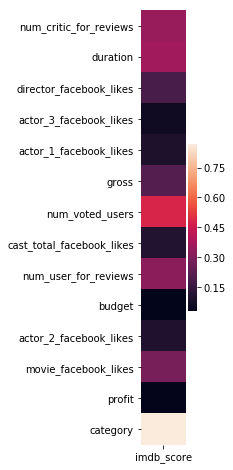

In [548]:
plt.figure(figsize=(1, 8))
sns.heatmap(corr1)

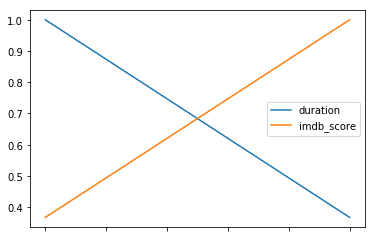

In [549]:
mov[['duration', 'imdb_score']].corr().plot()

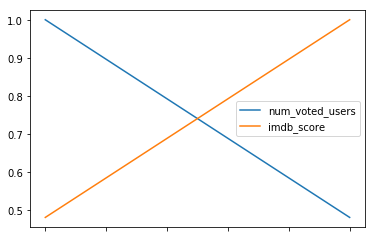

In [550]:
mov[['num_voted_users', 'imdb_score']].corr().plot()

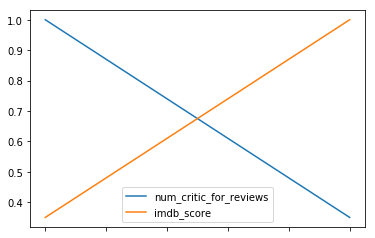

In [551]:
mov[['num_critic_for_reviews', 'imdb_score']].corr().plot()

We can clearly see that num_voted users, duration, num_critics_for_reviews are one of the most highly correlated values to the imdb_score. Their correlation coefficients are all positive, which means that the increase in any of these values increases the imdb_score (POSITIVE CORRELATION). At least, it means that these variables move together, and that in order to achieve a high imdb_score, a high value under these variables is preferred. 

We will further analyze these assumptions. 

### Data w/ Dummies

In [552]:
corr_dummies = pd.DataFrame(mov_dummies.corr()['imdb_score'].drop('imdb_score'))
corr_dummies.sort_values(['imdb_score'], ascending = False)

imdb_score
category                   0.869063  
num_voted_users            0.479849  
duration                   0.367416  
num_critic_for_reviews     0.350066  
num_user_for_reviews       0.324859  
movie_facebook_likes       0.283303  
gross                      0.217008  
 Drama                     0.201192  
director_facebook_likes    0.192275  
Biography                  0.157421  
Drama                      0.157185  
R                          0.140543  
 History                   0.130576  
Crime                      0.121203  
 Black and White           0.118431  
 War                       0.113889  
cast_total_facebook_likes  0.105933  
actor_2_facebook_likes     0.101092  
actor_1_facebook_likes     0.093268  
actor_3_facebook_likes     0.064876  
Approved                   0.064272  
 Biography                 0.056729  
 Documentary               0.052455  
Not Rated                  0.045282  
 Animation                 0.043489  
Unrated                    0.038655  
profit                     0.036174  
 Western                   0.034709  
Documentary                0.032101  
Adventure                  0.031709  
...                             ...  
Passed                     0.017960  
Mystery                    0.014255  
Romance                    0.009854  
Western                    0.008186  
G                          0.007096  
Sci-Fi                     0.006886  
Musical                    0.006321  
X                          0.003919  
GP                         0.003699  
Family                     0.001078  
 Mystery                   0.000754  
NC-17                     -0.003503  
 Romance                  -0.016581  
Fantasy                   -0.016782  
Thriller                  -0.019793  
 Music                    -0.021243  
 Adventure                -0.033957  
 Crime                    -0.048732  
 Thriller                 -0.049323  
 Sci-Fi                   -0.051142  
 Fantasy                  -0.061836  
PG                        -0.066270  
 Comedy                   -0.083662  
 Family                   -0.086927  
Action                    -0.094922  
 Horror                   -0.115462  
Color                     -0.118431  
Horror                    -0.122309  
PG-13                     -0.127095  
Comedy                    -0.171798  

[66 rows x 1 columns]

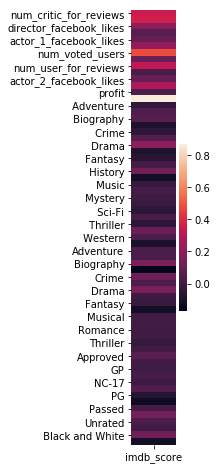

In [553]:
plt.figure(figsize=(1, 8))
sns.heatmap(corr_dummies)

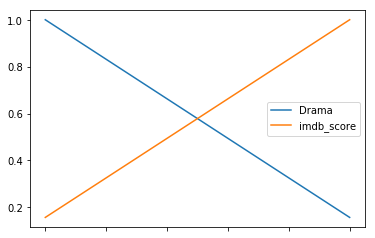

In [554]:
mov_dummies[['Drama', 'imdb_score']].corr().plot()

In this correlation analysis, we discovered that there are a few high or at least impactful correlations values affecting imdb_score among the different movie genres like Drama or Comedy. Still, none of these seem to be extremely impactful and including them in our model might create a "simplification" of life too complex to explain and understand. 

## REGRESSION

In [555]:
# build a model
y = mov['imdb_score']
X = mov.drop(['imdb_score', 'category'], axis =1)

Remember that we created a category column derived from our imdb_score, so adding that column to our regression models will be somewhat redundant and will create a faulty model.  

## Feature Selection

### RFE

In [556]:
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, 'duration'), (1, 'num_critic_for_reviews'), (2, 'num_user_for_reviews'), (3, 'actor_3_facebook_likes'), (4, 'actor_1_facebook_likes'), (5, 'actor_2_facebook_likes'), (6, 'cast_total_facebook_likes'), (7, 'director_facebook_likes'), (8, 'num_voted_users'), (9, 'movie_facebook_likes'), (10, 'gross'), (11, 'budget'), (12, 'profit')]


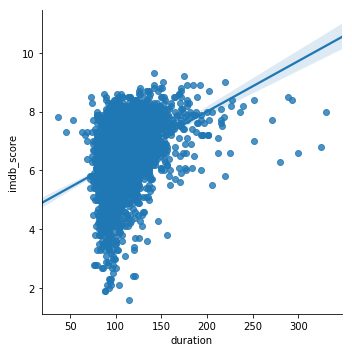

In [557]:
sns.lmplot('duration', 'imdb_score', mov)

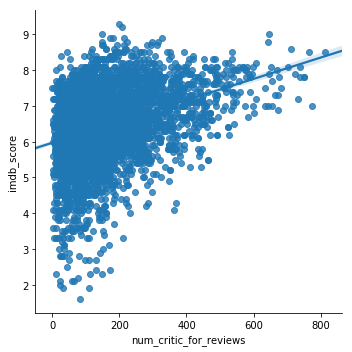

In [558]:
sns.lmplot('num_critic_for_reviews', 'imdb_score', mov)

We rely on this feature selection method to confirm the importance and rankings of these different variables we are considering to include in our models. According to our RFE, the most critical values include:
    - Duration
    - Num_critic_for_reviews
    - Num_user_for_reviews
    - Actor_3_facebook_likes 
        and so on... 
        
We will also be including num_voted_users since it ranks pretty well on our past correlation analyses. 

## Multiple Regression

In [559]:
model1 = lm.LinearRegression()
model1.fit(X,y)
model1_y = model1.predict(X)

In [560]:
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [ 1.56648667e-03  1.18418051e-02  7.74923318e-06  7.61776654e-05
  7.85909433e-05 -1.19615338e-09  3.98418992e-06 -7.82066476e-05
 -5.57632632e-04 -6.30545042e-10  8.01818292e-05 -2.75681756e-06
 -5.75047051e-10]
y-intercept  4.8531367475805585


In [561]:
pd.DataFrame(zip(X.columns, np.transpose(model1.coef_)))

0             1
0   num_critic_for_reviews     1.566487e-03
1   duration                   1.184181e-02
2   director_facebook_likes    7.749233e-06
3   actor_3_facebook_likes     7.617767e-05
4   actor_1_facebook_likes     7.859094e-05
5   gross                     -1.196153e-09
6   num_voted_users            3.984190e-06
7   cast_total_facebook_likes -7.820665e-05
8   num_user_for_reviews      -5.576326e-04
9   budget                    -6.305450e-10
10  actor_2_facebook_likes     8.018183e-05
11  movie_facebook_likes      -2.756818e-06
12  profit                    -5.750471e-10

In [562]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('num_critic_for_reviews', '0.002'),
 ('duration', '0.012'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-0.000'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000'),
 ('profit', '-0.000')]

In [563]:
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.7510169117202247
variance or r-squared:  0.3251624895836638


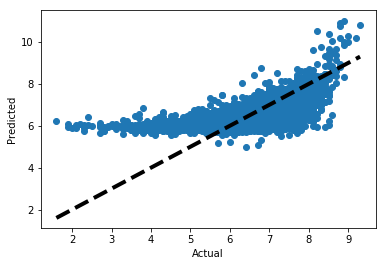

In [564]:
plt.subplots()
plt.scatter(y, model1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

The multiple regression yielded a very high MSE = 75% and a somewhat low R-Squared of 32%. 

Still, we can see that our most impactful values in terms of their coefficients include a few of the ones we considered earlier with the RFE ranking = num_critic_for_reviews, duration, and num_user_for_reviews.

## Ridge

In [565]:
# RIDGE
rig = lm.Ridge(alpha=0.1)             #higher alpha (penality parameter), fewer predictors
rig.fit(X, y)
rig_y = rig.predict(X)

In [566]:
print 'Coefficients: ', rig.coef_
print "y-intercept ", rig.intercept_

Coefficients:  [ 1.56648665e-03  1.18418044e-02  7.74923365e-06  7.61776652e-05
  7.85909432e-05 -4.90631881e-10  3.98418992e-06 -7.82066475e-05
 -5.57632621e-04 -1.33606653e-09  8.01818292e-05 -2.75681747e-06
 -1.28056854e-09]
y-intercept  4.853136822268734


In [567]:
coef = ["%.3f" % i for i in rig.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('num_critic_for_reviews', '0.002'),
 ('duration', '0.012'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-0.000'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000'),
 ('profit', '-0.000')]

In [568]:
sorted(zip(coef, xcolumns), reverse=True)

[('0.012', 'duration'),
 ('0.002', 'num_critic_for_reviews'),
 ('0.000', 'num_voted_users'),
 ('0.000', 'director_facebook_likes'),
 ('0.000', 'actor_3_facebook_likes'),
 ('0.000', 'actor_2_facebook_likes'),
 ('0.000', 'actor_1_facebook_likes'),
 ('-0.001', 'num_user_for_reviews'),
 ('-0.000', 'profit'),
 ('-0.000', 'movie_facebook_likes'),
 ('-0.000', 'gross'),
 ('-0.000', 'cast_total_facebook_likes'),
 ('-0.000', 'budget')]

In [569]:
print "mean square error: ", mean_squared_error(y, rig_y)
print "variance or r-squared: ", explained_variance_score(y, rig_y)

mean square error:  0.751016911720225
variance or r-squared:  0.32516248958366345


Surprisingly, our Ridge Regressor yielded the same results: MSE = 75% and R-Squared = 32.5%.

Same values considered. 

## Lasso (regularization)

In [570]:
model2 = lm.Lasso(alpha=0.1)             #higher alpha (penality parameter), fewer predictors
model2.fit(X, y)
model2_y = model1.predict(X)

C:\Users\fabri\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [571]:
print 'Coefficients: ', model2.coef_
print "y-intercept ", model2.intercept_

Coefficients:  [ 1.54639863e-03  1.16042490e-02  7.89760417e-06  7.23386507e-05
  7.60389079e-05 -1.83677799e-09  3.98565715e-06 -7.56552156e-05
 -5.51037992e-04  3.99476169e-12  7.76744405e-05 -2.67699772e-06
  5.80394367e-11]
y-intercept  4.878139788650624


In [572]:
coef = ["%.3f" % i for i in model2.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('num_critic_for_reviews', '0.002'),
 ('duration', '0.012'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '0.000'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000'),
 ('profit', '0.000')]

In [573]:
sorted(zip(coef, xcolumns), reverse=True)

[('0.012', 'duration'),
 ('0.002', 'num_critic_for_reviews'),
 ('0.000', 'profit'),
 ('0.000', 'num_voted_users'),
 ('0.000', 'director_facebook_likes'),
 ('0.000', 'budget'),
 ('0.000', 'actor_3_facebook_likes'),
 ('0.000', 'actor_2_facebook_likes'),
 ('0.000', 'actor_1_facebook_likes'),
 ('-0.001', 'num_user_for_reviews'),
 ('-0.000', 'movie_facebook_likes'),
 ('-0.000', 'gross'),
 ('-0.000', 'cast_total_facebook_likes')]

In [574]:
a = zip(xcolumns, coef)
df = pd.DataFrame(a)
df.sort_values(1, ascending=False)

0       1
1   duration                   0.012 
0   num_critic_for_reviews     0.002 
2   director_facebook_likes    0.000 
3   actor_3_facebook_likes     0.000 
4   actor_1_facebook_likes     0.000 
6   num_voted_users            0.000 
9   budget                     0.000 
10  actor_2_facebook_likes     0.000 
12  profit                     0.000 
8   num_user_for_reviews       -0.001
5   gross                      -0.000
7   cast_total_facebook_likes  -0.000
11  movie_facebook_likes       -0.000

In [575]:
print "mean square error: ", mean_squared_error(y, model2_y)
print "variance or r-squared: ", explained_variance_score(y, model2_y)

mean square error:  0.7510169117202247
variance or r-squared:  0.3251624895836638


Again, our regularization method (Lasso) returns us to a high MSE and a somewhat low R-Squared = 75% and 32.5% respectively. 

## Random Forest

In [577]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

In [579]:
print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  0.10129457466420859
variance or r-squared:  0.9090637754956783


In [580]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.02773496253906633, 'actor_1_facebook_likes'),
 (0.028618225463230874, 'cast_total_facebook_likes'),
 (0.033922244007044855, 'profit'),
 (0.035505112208748225, 'actor_2_facebook_likes'),
 (0.03685660920768863, 'movie_facebook_likes'),
 (0.03759415775949896, 'actor_3_facebook_likes'),
 (0.038513986377400264, 'director_facebook_likes'),
 (0.05119613516791718, 'num_critic_for_reviews'),
 (0.07019541600319448, 'gross'),
 (0.07466413916963746, 'num_user_for_reviews'),
 (0.11134736134433872, 'budget'),
 (0.11964316512348505, 'duration'),
 (0.33420848562874894, 'num_voted_users')]

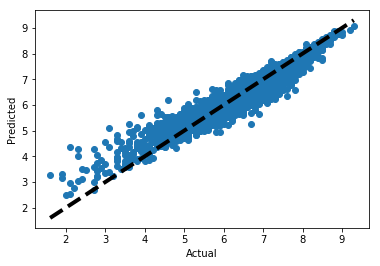

In [581]:
plt.subplots()
plt.scatter(y, regr_predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Now, we run onto our best model yet. The Random Forest Regressor (a model highly recommended by our instructor), yielded our highest R-Squared of almost 91% with a very low MSE of about 10%. 

This means that our model explains/fits reality with about a 91% accuracy. 

In [427]:
y_2 = mov['imdb_score'] 
X_2 = mov.drop(['budget','duration','num_voted_users', 'imdb_score', 'category'], axis =1)

regr = RandomForestRegressor(random_state=0)
regr.fit(X_2, y_2)
regr_predicted = regr.predict(X_2)

print "mean square error: ", mean_squared_error(y_2, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y_2, regr_predicted)

mean square error:  0.12938124835396367
variance or r-squared:  0.8838915729494266


In [428]:
sorted(zip(regr.feature_importances_, X_2.columns))

[(0.052739064296216775, 'actor_2_facebook_likes'),
 (0.05419254558972182, 'cast_total_facebook_likes'),
 (0.05475084632538463, 'actor_1_facebook_likes'),
 (0.06185325253386923, 'actor_3_facebook_likes'),
 (0.09221636981859269, 'director_facebook_likes'),
 (0.10035739596098425, 'profit'),
 (0.10516687290870357, 'num_critic_for_reviews'),
 (0.11972369187635468, 'gross'),
 (0.1451834563260064, 'num_user_for_reviews'),
 (0.21381650436416594, 'movie_facebook_likes')]

# CLASSIFICATION

### Model

In [429]:
y = mov['category']
X = mov.drop(['category', 'imdb_score'], axis=1)

Now, we use our category column as our y-value in order to better classify our imdb-scores and our models. I developed a few graphs to show some basic profiling in terms of specific variables.  

## RFE

In [430]:
model = LogisticRegression()
rfe = RFE(model, 4)  #asking four best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
print "------------------------"

print " "
rfe_class_ranks = rfe.ranking_
print sorted(zip(rfe_class_ranks, X.columns))

[ True  True False False False False False False  True False  True False
 False]
[ 1  1  5  2  3  9  7  4  1  8  1  6 10]
------------------------
 
[(1, 'actor_2_facebook_likes'), (1, 'duration'), (1, 'num_critic_for_reviews'), (1, 'num_user_for_reviews'), (2, 'actor_3_facebook_likes'), (3, 'actor_1_facebook_likes'), (4, 'cast_total_facebook_likes'), (5, 'director_facebook_likes'), (6, 'movie_facebook_likes'), (7, 'num_voted_users'), (8, 'budget'), (9, 'gross'), (10, 'profit')]


In [431]:
X_logistic = mov[['duration', 'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users']]
print X_logistic.head()

   duration  num_critic_for_reviews  num_user_for_reviews  num_voted_users
0  178.0     723.0                   3054.0                886204         
1  169.0     302.0                   1238.0                471220         
2  148.0     602.0                   994.0                 275868         
3  164.0     813.0                   2701.0                1144337        
5  132.0     462.0                   738.0                 212204         


In [433]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.65
[[  0   0  29   0]
 [  0   0 340   0]
 [  0   1 721   4]
 [  0   0  25  20]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        29
          2       0.00      0.00      0.00       340
          3       0.65      0.99      0.78       726
          4       0.83      0.44      0.58        45

avg / total       0.44      0.65      0.52      1140



C:\Users\fabri\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ValueError: multiclass format is not supported

We used a feature selection model (RFE) again, to establish and confirm that the values we are considering significant keep their level of impact on our y-value. We can still observe that duration, num_critics_for_reviews and num_user_for_reviews, rank the highest in our feature selection model which has an accuracy of 65%. 

## Decision Tree

In [434]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [435]:
print len(X_train), len(y_train)
print len(X_test), len(y_test)

2657 2657
1140 1140


In [436]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.6728070175438596
--------------------------------------------------------
[[  1  21   7   0]
 [ 16 166 158   0]
 [ 17 122 573  14]
 [  0   1  17  27]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.03      0.03      0.03        29
          2       0.54      0.49      0.51       340
          3       0.76      0.79      0.77       726
          4       0.66      0.60      0.63        45

avg / total       0.67      0.67      0.67      1140

--------------------------------------------------------


ValueError: multiclass format is not supported

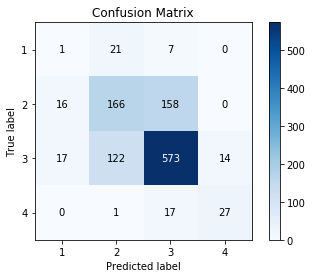

In [437]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

In [438]:
tree.export_graphviz(dt, out_file='data/decisiontree2.dot', feature_names=X.columns)

In [439]:
from IPython.display import Image
Image("data/decisiontree2.png")

Our decision tree has a 67% accuracy. However, our full grown tree is too complicated to be practical.

In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
dt_simple.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [441]:
print metrics.accuracy_score(y_test, dt_simple.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt_simple.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt_simple.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt_simple.predict(X_test))

0.718421052631579
--------------------------------------------------------
[[  0  18  11   0]
 [  0 151 189   0]
 [  0  75 647   4]
 [  0   0  24  21]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        29
          2       0.62      0.44      0.52       340
          3       0.74      0.89      0.81       726
          4       0.84      0.47      0.60        45

avg / total       0.69      0.72      0.69      1140

--------------------------------------------------------


C:\Users\fabri\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ValueError: multiclass format is not supported

We reduce the max depth of our decision tree to make our previous model more practical, and our model accuracy increases all the way to 71.8%. 

In [442]:
tree.export_graphviz(dt_simple, out_file='data/decisiontree_simple2.dot', feature_names=X.columns)

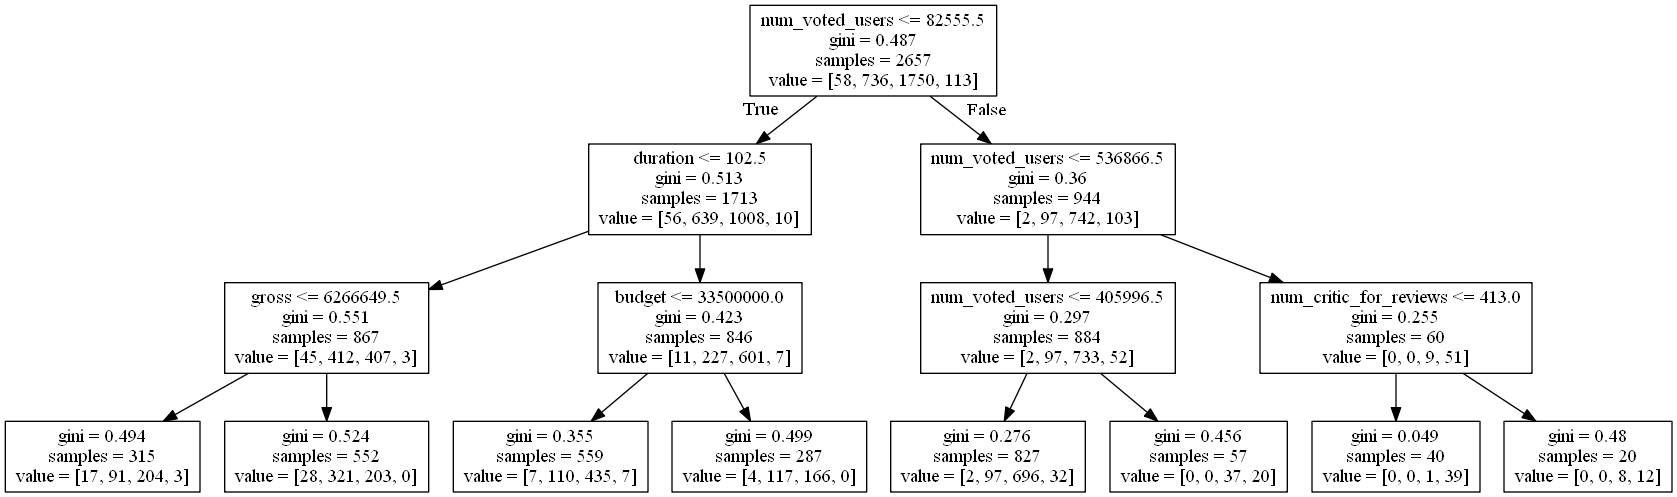

In [443]:
from IPython.display import Image
Image("data/decisiontree_simple2.png")

## KNN

Text(0,0.5,'accuracy')

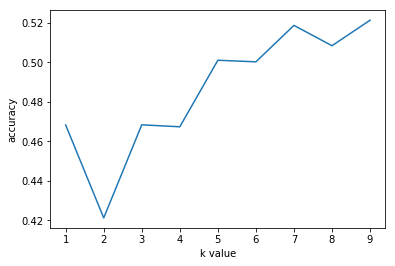

In [444]:
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=10, scoring='accuracy')))

# plot the K values (x-axis) versus the 10-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('accuracy')

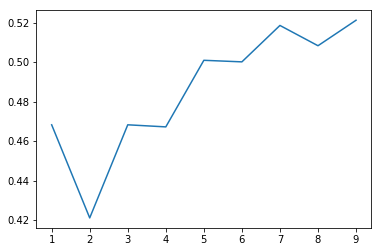

In [445]:
from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()

In [446]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.521200948117
{'n_neighbors': 9}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


In [447]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize KNeighborsClassifier() and train a KNN Model
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [448]:
print metrics.accuracy_score(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, knn.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.6166666666666667
--------------------------------------------------------
[[  0   5  24   0]
 [  0  74 266   0]
 [  0  97 629   0]
 [  0   6  39   0]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        29
          2       0.41      0.22      0.28       340
          3       0.66      0.87      0.75       726
          4       0.00      0.00      0.00        45

avg / total       0.54      0.62      0.56      1140

--------------------------------------------------------


C:\Users\fabri\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ValueError: multiclass format is not supported

Our KNN model is maybe one of our weakest models with an accuracy of 52%. 

## Random Forest Classifier

In [449]:
clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7359649122807017

In [450]:
print metrics.accuracy_score(y_test, clf.predict(X_test)) #overall accuracy
print metrics.confusion_matrix(y_test, clf.predict(X_test))
print metrics.classification_report(y_test, clf.predict(X_test))

0.7359649122807017
[[  0  21   8   0]
 [  0 168 172   0]
 [  1  71 651   3]
 [  0   0  25  20]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        29
          2       0.65      0.49      0.56       340
          3       0.76      0.90      0.82       726
          4       0.87      0.44      0.59        45

avg / total       0.71      0.74      0.71      1140



In [451]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0523, 'actor_1_facebook_likes'), (0.0528, 'actor_3_facebook_likes'), (0.0537, 'actor_2_facebook_likes'), (0.0543, 'movie_facebook_likes'), (0.0577, 'cast_total_facebook_likes'), (0.0607, 'director_facebook_likes'), (0.0774, 'profit'), (0.0795, 'num_user_for_reviews'), (0.0798, 'num_critic_for_reviews'), (0.0828, 'budget'), (0.0898, 'gross'), (0.1103, 'duration'), (0.1489, 'num_voted_users')]


In [452]:
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).\
                                                    sort_values('importance',ascending=False).head()

feature  importance
6  num_voted_users         0.148879  
1  duration                0.110269  
5  gross                   0.089810  
9  budget                  0.082756  
0  num_critic_for_reviews  0.079800

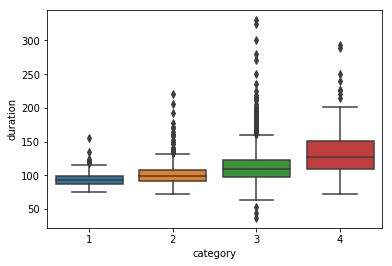

In [453]:
sns.boxplot(mov.category, mov.duration)

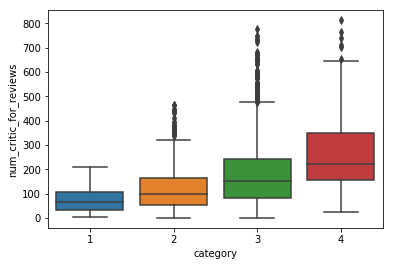

In [454]:
sns.boxplot(mov.category, mov.num_critic_for_reviews)

C:\Users\fabri\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\fabri\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


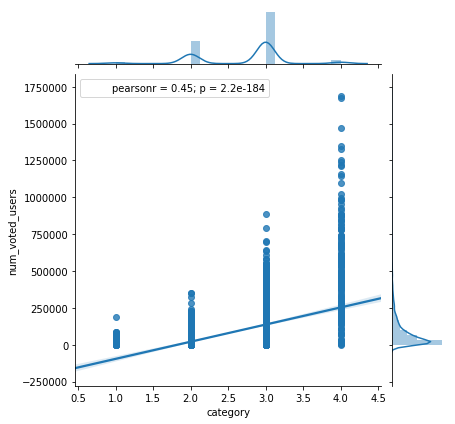

In [455]:
regjointplot = sns.jointplot("category", "num_voted_users", mov, kind="reg")

# CLUSTERING

We now start by normilizing the data. Given that we have so many different scales, trying to analyze them altogether may be causing our models to be somewhat innacurate. By clustering, we will try to profile each of our movies into clusters of similar movies throughout all the variables (characteristics) that we are analyzing. 

In [456]:
mov.var()

num_critic_for_reviews       1.532887e+04
duration                     5.116635e+02
director_facebook_likes      9.292509e+06
actor_3_facebook_likes       3.430574e+06
actor_1_facebook_likes       2.395819e+08
gross                        4.839942e+15
num_voted_users              2.279064e+10
cast_total_facebook_likes    3.611829e+08
num_user_for_reviews         1.676608e+05
budget                       5.054188e+16
actor_2_facebook_likes       2.022210e+07
imdb_score                   1.113179e+00
movie_facebook_likes         4.582351e+08
profit                       5.223582e+16
category                     3.340215e-01
dtype: float64

In [457]:
mov_norm = (mov - mov.mean()) / (mov.max() - mov.min())
mov_norm.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0  0.687487                0.231979 -0.034560                  
1  0.169014                0.201263 -0.010081                  
2  0.538472                0.129590 -0.034560                  
3  0.798324                0.184198  0.921962                  
5  0.366058                0.074983 -0.013908                  

   actor_3_facebook_likes  actor_1_facebook_likes     gross  num_voted_users  \
0  0.004330               -0.010391                0.932072  0.463052          
1  0.010634                0.050546                0.338912  0.217462          
2 -0.025844                0.005234                0.195152  0.101852          
3  0.967156                0.030234                0.521326  0.615817          
5 -0.009801               -0.010954                0.028138  0.064175          

   cast_total_facebook_likes  num_user_for_reviews    budget  \
0 -0.009933                   0.538340              0.015675   
1  0.056329                   0.179375              0.020832   
2  0.000522                   0.131145              0.016330   
3  0.145268                   0.468563              0.016739   
5 -0.014441                   0.080542              0.017861   

   actor_2_facebook_likes  imdb_score  movie_facebook_likes    profit  \
0 -0.007635                0.187072    0.068178              0.040620   
1  0.022030                0.083176   -0.026378              0.000256   
2 -0.011598                0.044215    0.217175             -0.004009   
3  0.153416                0.264994    0.443536              0.015074   
5 -0.009854                0.018241    0.042390             -0.015450   

   category  
0  0.095865  
1  0.095865  
2  0.095865  
3  0.429198  
5  0.095865

### Elbow Method

Text(0.5,1,'Selecting k with the Elbow Method')

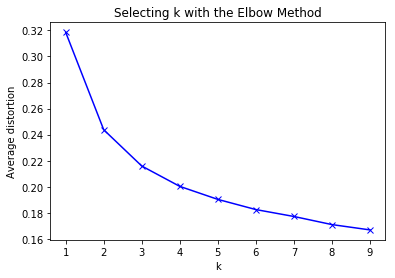

In [458]:
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(mov_norm) 
    meandistortions.append(sum(np.min(cdist(mov_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / mov_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

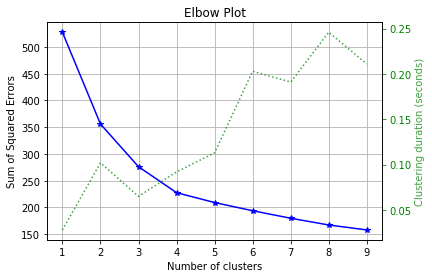

In [459]:
import scikitplot as skplt

kmeans = KMeans(random_state=1) 
skplt.cluster.plot_elbow_curve(kmeans, mov_norm, cluster_ranges=range(1, 10))

We use the elbow method to have a statistical reference for the optimal number of clusters to be created in our analysis. It is still up to our own judgement to decide the the amount of clusters needed, but according to the graph, there is no significant change when going from 4-5 or 5-6. This may mean that our optimal number of cluster could be within these values. 

## Cluster Deployment

In [460]:
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)
k_means.fit(mov_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [461]:
k_means.labels_

array([3, 3, 3, ..., 2, 2, 2])

In [462]:
k_means.cluster_centers_

array([[ 1.12619370e-01,  5.74304408e-02,  6.14790963e-01,
         3.86091684e-02,  9.69917154e-03,  5.62702104e-02,
         1.12582620e-01,  1.48338091e-02,  7.52688355e-02,
         7.20455584e-04,  1.56871250e-02,  1.19353820e-01,
         3.86270355e-02,  2.66888685e-03,  1.56471217e-01],
       [-6.28450676e-02, -3.24322737e-02, -2.60844478e-02,
        -5.36372042e-03, -2.39142365e-03, -2.19943626e-02,
        -3.85181701e-02, -3.34908953e-03, -2.53042116e-02,
        -7.06612913e-04, -4.06420318e-03, -1.60655174e-01,
        -1.65649917e-02, -6.35576051e-04, -2.62663659e-01],
       [-4.02023819e-02,  1.58824633e-03, -2.70143783e-02,
        -1.05390295e-02, -1.55517910e-03, -1.93609114e-02,
        -2.10913675e-02, -2.79355199e-03, -1.93718447e-02,
        -8.27319365e-04, -3.03914035e-03,  5.31882466e-02,
        -1.51398183e-02, -3.62568468e-04,  1.01854205e-01],
       [ 2.45046929e-01,  4.66752855e-02, -2.21150735e-02,
         3.81578303e-02,  7.88298731e-03,  9.99355778

In [463]:
mov_norm1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
mov_norm1.head()

cluster
0  3      
1  3      
2  3      
3  0      
4  3

In [464]:
mov = mov.reset_index(drop=True)
mov_norm1 = mov_norm1.reset_index(drop=True)

mov_norm2 = mov.join(mov_norm1)
mov_norm2.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0  723.0                   178.0     0.0                       
1  302.0                   169.0     563.0                     
2  602.0                   148.0     0.0                       
3  813.0                   164.0     22000.0                   
4  462.0                   132.0     475.0                     

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0  855.0                   1000.0                  760505847.0   
1  1000.0                  40000.0                 309404152.0   
2  161.0                   11000.0                 200074175.0   
3  23000.0                 27000.0                 448130642.0   
4  530.0                   640.0                   73058679.0    

   num_voted_users  cast_total_facebook_likes  num_user_for_reviews  \
0  886204           4834                       3054.0                 
1  471220           48350                      1238.0                 
2  275868           11700                      994.0                  
3  1144337          106759                     2701.0                 
4  212204           1873                       738.0                  

        budget  actor_2_facebook_likes  imdb_score  movie_facebook_likes  \
0  237000000.0  936.0                   7.9         33000                  
1  300000000.0  5000.0                  7.1         0                      
2  245000000.0  393.0                   6.8         85000                  
3  250000000.0  23000.0                 8.5         164000                 
4  263700000.0  632.0                   6.6         24000                  

        profit  category  cluster  
0  523505847.0  3         3        
1  9404152.0    3         3        
2 -44925825.0   3         3        
3  198130642.0  4         0        
4 -190641321.0  3         3

## Random Forest Classifier

In [465]:
y = mov_norm2['cluster']
X = mov_norm2.drop(['category', 'imdb_score', 'cluster'], axis=1)

In [466]:
from sklearn.ensemble import RandomForestClassifier

mov_cmodel = RandomForestClassifier(n_estimators=20)
mov_cmodel = mov_cmodel.fit(X, y)
clf.score(X,y)

0.1522254411377403

In [467]:
print metrics.accuracy_score(y, clf.predict(X)) #overall accuracy
print metrics.confusion_matrix(y, clf.predict(X))
print metrics.classification_report(y, clf.predict(X))

0.1522254411377403
[[   0    0    5  120   29]
 [   0   56  911  184    0]
 [   0    1   67 1857   24]
 [   0    0    9  455   79]
 [   0    0    0    0    0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       154
          1       0.98      0.05      0.09      1151
          2       0.07      0.03      0.05      1949
          3       0.17      0.84      0.29       543
          4       0.00      0.00      0.00         0

avg / total       0.36      0.15      0.09      3797



C:\Users\fabri\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fabri\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Unfortunately our Random Forest Classifier yielded an accuracy of just 15%. 

## Profiling

In [468]:
mov_norm2.groupby('cluster').mean()

num_critic_for_reviews    duration  director_facebook_likes  \
cluster                                                                
0        256.207792              126.857143  14935.064935              
1        113.730669              100.527368  194.930495                
2        132.198050              110.496665  173.464341                
3        363.872928              123.725599  286.712707                

         actor_3_facebook_likes  actor_1_facebook_likes         gross  \
cluster                                                                 
0        1643.428571             13857.740260            9.445343e+07   
1        632.052129              6119.759340             3.493278e+07   
2        513.269882              6653.080554             3.694568e+07   
3        1634.213628             12713.237569            1.277918e+08   

         num_voted_users  cast_total_facebook_likes  num_user_for_reviews  \
cluster                                                                     
0        294000.681818    21098.870130               711.324675             
1        38679.331017     9157.615117                202.525630             
2        68179.484864     9521.876347                232.511031             
3        315503.235727    19843.441989               845.753223             

               budget  actor_2_facebook_likes  imdb_score  \
cluster                                                     
0        5.432278e+07  4131.077922             7.378571     
1        3.689042e+07  1425.145960             5.222502     
2        3.542342e+07  1565.289379             6.869010     
3        9.756982e+07  4048.167587             7.351381     

         movie_facebook_likes        profit  category  
cluster                                                
0        22686.850649          4.013065e+07  3.181818  
1        3424.833189          -1.957646e+06  1.924414  
2        3940.216521           1.522268e+06  3.017958  
3        36537.753223          3.022201e+07  3.152855

In [586]:
mov_norm2.groupby('cluster')['imdb_score'].mean().sort_values(ascending=False)

cluster
0    7.378571
3    7.351381
2    6.869010
1    5.222502
Name: imdb_score, dtype: float64

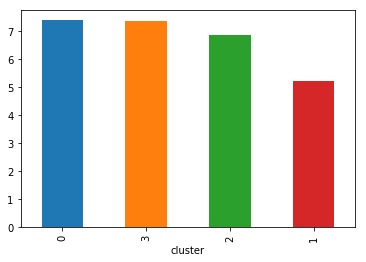

In [587]:
mov_norm2.groupby('cluster')['imdb_score'].mean().sort_values(ascending=False).plot(kind='bar')

In [584]:
mov_norm2.groupby('cluster')['duration'].mean().sort_values(ascending=False)

cluster
0    126.857143
3    123.725599
2    110.496665
1    100.527368
Name: duration, dtype: float64

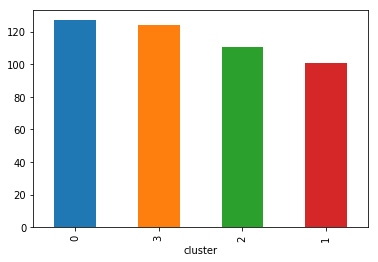

In [585]:
mov_norm2.groupby('cluster')['duration'].mean().sort_values(ascending=False).plot(kind='bar')

In [588]:
mov_norm2.groupby('cluster')['num_critic_for_reviews'].mean().sort_values(ascending=False)

cluster
3    363.872928
0    256.207792
2    132.198050
1    113.730669
Name: num_critic_for_reviews, dtype: float64

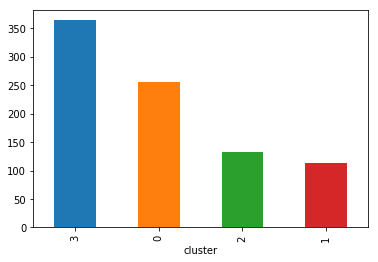

In [589]:
mov_norm2.groupby('cluster')['num_critic_for_reviews'].mean().sort_values(ascending=False).plot(kind='bar')

In [590]:
mov_norm2.groupby('cluster')['num_voted_users'].mean().sort_values(ascending=False)

cluster
3    315503.235727
0    294000.681818
2    68179.484864 
1    38679.331017 
Name: num_voted_users, dtype: float64

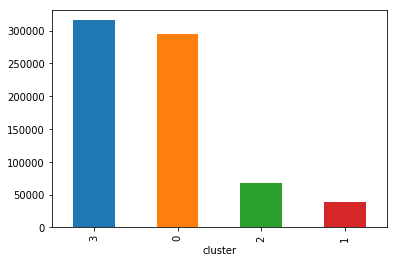

In [591]:
mov_norm2.groupby('cluster')['num_voted_users'].mean().sort_values(ascending=False).plot(kind='bar')

We run into a weird situation in which our cluster 0 and cluster 3, have very close IMDB Scores and some categories favor one or the other. For example, we can observe that movies with: 
   - Avg Duration of 126 min get the highest IMDB Score = cluster 0.
   - Higher average number of critic for reviews and number of voted users: 363 & 315503 respectively, fall under cluster 3. 
  
This may mean that, since cluster 0 has a higher avg IMDB Score, that movies that fall within 126 min, and receive averages of 256 number of critic for reviews and 294000 number of voted users, get higher IMDB Scores. 

# Story Telling

After going through all these analyses, we can conclude that there were a few repetitive variables that have ranked higher than all others in almost every test or model like:
    - duration
    - num_critic_for_reviews
    - num_voted_users
These varaibles, amongst a few other like the Genre (like Drama for example with a high correlation to our imdb scores) can probably predict a decent amount of information needed to create high-quality, high/ranking movies. From our different Feature Selection models, we can see that these particular rankings explain a great deal of what reality actually looks like, and with the help of a few other less impactful values, they can reach very high accuracy scores. 

Among our 3 categories:
    - Regression
    - Classification 
    - Duration
... these our the best models created.

Regression:
    - Multiple Regression:
       - MSE: 75%
       - R-Squared: 32.5%
    - Ridge:
       - MSE: 75%
       - R-Squared: 32.5%
    - Lasso:
       - MSE: 75%
       - R-Squared: 32.5%
    - Random Forest:
       - MSE: 10%
       - R-Squared: 90.9%
Classification:
   - RFE: 
       - ACCURACY: 65%
   - Decision Tree: 
       - ACCURACY: 68.3%
   - Decision Tree (reduced depth):
       - ACCURACY: 71.8%
   - KNN:
       - ACCURACY: 52.1%
   
   - Random Forest Classifier:
       - ACCURACY: 74%

Cluster:
   -Random Forest Classifier:
       - Accuracy: 15%
      
According to all my analysis, in order for a movie to score between a 8-10 in terms of IMDB's ranking, they should mostly focus on creating movies that in a way are "for the customer". This means that following trends is a safe route for different producers. This does not mean that going against all trends and flow wouldn't result in a good score, but the most influential variables are affected by critics and votes from customers in the IMDB website. This means that not even budget or profit is as influential as how the customer perceives and ranks the movie. Still, of course, every effort should be made to reach this goal. One of the most apparent influential varaibles that can be controlled before releasing the movie like the duration of the movie. Apparently if the movie lies within an average of 123 minutes it usually receives a high imdb-score. The ranking could be better if it's scale would consider control variable from the producers and developers. What I mean by that is that the scale is pretty much influence by how the audience reacts rather by what the companies can do themselves to achieve a good reaction. For example a scale that would be more influenced by budget or likes for posters and releases. Even though these variables are included here, again, the scale does not consider them as much as customer reviews. 

     